# Sentinel-2 Image Analysis 

- [Pre-processing](#Pre-processing)  
- [Normalize the Sentinel-2 Images](#Normalize-the-Sentinel-2-Images)
- [Dividing Images into Chips of 224x224 Pixels](#Dividing-Images-into-Chips-of-224x224-Pixels)
- [Visualize an Example Chip](Visualize-an-Example-Chip)

# Deep Learning - ResNet-50

- [Pass all the Normalized Chips through the ResNet-50 Model](#Pass-all-the-Normalized-Chips-through-the-ResNet-50-Model)
- [Extract ResNet-50 Features from Each Chip](#Extract-ResNet-50-Features-from-Each-Chip)
- [Created a Dataset to Include all the Normalized Chips](#Created-a-Dataset-to-Include-all-the-Normalized-Chips)

# Statistical Analysis for Features

- [Created Histograms for the 2,048 Features and Saved them in a File](#Created-Histograms-for-the-2,048-Features-and-Saved-them-in-a-File)
- [Conducting KL-Divergence for all the Histograms Created](#Conducting-KL-Divergence-for-all-the-Histograms-Created)

# Convert the Image Chips into Polygons

- [Extracting Longitude and Latitude from the jp2 Image](#Extracting-Longitude-and-Latitude-from-the-jp2-Image)
- [Joining the Census Tract Polygon and the Chips Polygon Tables](#Joining-the-Census-Tract-Polygon-and-the-Chips-Polygon-Tables)
- [Show the Census Tract Polygon (in Blue) and the Chips Polygon (in Green)](#Show-the-Census-Tract-Polygon-(in-Blue)-and-the-Chips-Polygon-(in-Green))

# Machine Learning Analysis 

- [Linear Regression for all Features](#Linear-Regression-for-all-Features)
- [Linear Regression Scatter Plot for Testing](#Linear-Regression-Scatter-Plot-for-Testing)
- [Linear Regression for Scatter Plot for Training](#Linear-Regression-for-Scatter-Plot-for-Training)
- [Random Forest for All Features](#Random-Forest-for-All-Features)
- [Random Forest Scatter Plot](#Random-Forest-Scatter-Plot)
- [Renamed the df to df_final](#Renamed-the-df-to-df_final)
- [Linear Regression for the Average Features Vectors for Each Census Tract](#Linear-Regression-for-the-Average-Features-Vectors-for-Each-Census-Tract)
- [Linear Regression for the Area Weighted Average for Each Census Tract](#Linear-Regression-for-the-Area-Weighted-Average-for-Each-Census-Tract)
- [The Average Features Vectors for Each Census Tract](#The-Average-Features-Vectors-for-Each-Census-Tract)
- [Linear Regression for the Average Features Vectors for Each Census Tract (All Features)](#Linear-Regression-for-the-Average-Features-Vectors-for-Each-Census-Tract-(All-Features))
- [Linear Regression for the Average Features Vectors for Each Census Tract (Selected Features)](#Linear-Regression-for-the-Average-Features-Vectors-for-Each-Census-Tract-(Selected-Features))
- [Random Selection for the Average Features Vectors for Each Census Tract (All Features)](#Random-Selection-for-the-Average-Features-Vectors-for-Each-Census-Tract-(All-Features))
- [Random Selection for the Average Features Vectors for Each Census Tract (Selected Features)](#Random-Selection-for-the-Average-Features-Vectors-for-Each-Census-Tract-(Selected-Features))
- [The Area Weighted Average for Each Census Tract](#The-Area-Weighted-Average-for-Each-Census-Tract)
- [Linear Regression for the Area Weighted Average for Each Census Tract](#Linear-Regression-for-the-Area-Weighted-Average-for-Each-Census-Tract)
- [Random Forest for the Area Weighted Average for Each Census Tract](#Random-Forest-for-the-Area-Weighted-Average-for-Each-Census-Tract)


## Pre-processing

In [1]:
%pip install scikit-image tqdm torch torchvision validators

     |████████████████████████████████| 13.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 15.7 MB/s  eta 0:00:01
     |█████████████                   | 315.6 MB 162.1 MB/s eta 0:00:03

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |█████████████████████████████▉  | 725.9 MB 130.3 MB/s eta 0:00:01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 779.1 MB 4.1 kB/s 
     |████████████████████████████████| 7.0 MB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 111.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 111.2 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 98.5 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 94.1 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 410.6 MB 13 kB/s s eta 0:00:01     |████████████████████████████▌   | 366.2 MB 37.1 MB/s eta 0:00:02     |██████████████████████████████  | 384.7 MB 20.8 MB/s eta 0:00:02
     |████████████████████████████████| 196.0 MB 78 kB/s s eta 0:00:01     |█████████████████▊              | 108.7 MB 28.9 MB/s eta 0:00:04     |█████████████████████▋          | 132.4 MB 16.1 MB/s eta 0:00:04     |██████████████████████████████▏

In [2]:
import rasterio
import numpy as np
import os
import skimage.io as sio 

In [3]:
%matplotlib inline

## Normalize the Sentinel-2 Images

In [12]:
import numpy as np
import glob
import tqdm
from multiprocessing.pool import ThreadPool

blue_images = sorted(glob.glob('/data/obesity-images/*/T1*B02*.jp2'))  # blue
green_images = sorted(glob.glob('/data/obesity-images/*/T1*B03*.jp2'))  # green
red_images = sorted(glob.glob('/data/obesity-images/*/T1*B04*.jp2'))  # red

def normalize(input_path, output_path=None):
    if output_path is None:
        output_path = input_path.replace('.jp2', '_normalized.tif')
    with rasterio.open(input_path) as src:
        img = src.read()

        # Normalization
        img_min = img.min()
        img_max = img.max()
        img_norm = (img - img_min) / (img_max - img_min)

        with rasterio.open(
            output_path,
            'w',
            driver='GTiff',
            height = src.height,
            width = src.width,
            count = src.count,
            dtype = np.float32,
            crs = src.crs,
            transform = src.transform
        ) as dst:
            dst.write(img_norm)

all_bands = blue_images + green_images + red_images

# with ThreadPool(32) as p:
#     list(tqdm.tqdm(
#         p.imap(normalize, all_bands), total=len(all_bands)))

# for image in tqdm.tqdm(all_bands):
#     normalize(image)

# normalize('T15SWD_20230829T165849_B03_10m.jp2', 'T15SWD_20230829T165849_B03_10m_normalized.tif')
# normalize('T15SWD_20230829T165849_B04_10m.jp2', 'T15SWD_20230829T165849_B04_10m_normalized.tif') 

# total number of setinel-2 images to cover the entire state of Missouri is 33 images with 3 RGB bands each. 

## Dividing Images into Chips of 224x224 Pixels

In [13]:
import tqdm
import os
from concurrent.futures import ThreadPoolExecutor

# OUT_DIR = '/home/jovyan/output_images_all'
OUT_DIR = '/data/output_images_all'
os.makedirs(OUT_DIR, exist_ok=True)

def chip_raster(input_path, output_dir, chip_size):
    basename = os.path.basename(input_path).split('.')[0]
    with rasterio.open(input_path) as src:
        width, height = src.width, src.height
        transform = src.transform
        for x in range(0, width, chip_size):
            for y in range(0, height, chip_size):
                # Define the parameters for the new cropped raster
                window = rasterio.windows.Window(x, y, chip_size, chip_size)
                transform_chip = rasterio.windows.transform(window, transform)
                
                # Read the window of the raster
                chip = src.read(window = window)
                
                output_path = f"{output_dir}/{basename}_chip_{x:05d}_{y:05d}.tif"
                
                # Write the chip to a new file
                with rasterio.open(output_path, 'w', driver='GTiff', 
                                   height = chip_size, width = chip_size, count = src.count,
                                   dtype = np.float32, crs = src.crs, 
                                   transform = transform_chip) as dst:
                    dst.write(chip)
    print(f'done with {input_path}')

def chip_images(images, output_dir, chip_size):
    with ThreadPoolExecutor(max_workers=32) as executor:  # Adjust the number of workers as needed
        for image in images:
            executor.submit(chip_raster, image.replace('.jp2', '_normalized.tif'), output_dir, chip_size)

# Assuming red_images, green_images, and blue_images are lists of image paths
all_images = red_images + green_images + blue_images
# chip_images(all_images, OUT_DIR, 224)


# chip the normalized images
# for red_image, green_image, blue_image in zip(red_images, green_images, blue_images):
#     chip_raster(red_image.replace('.jp2', '_normalized.tif'), OUT_DIR, 224) # - (B02: Blue Band)
#     chip_raster(green_image.replace('.jp2', '_normalized.tif'), OUT_DIR, 224) # - (B02: Blue Band)
#     chip_raster(blue_image.replace('.jp2', '_normalized.tif'), OUT_DIR, 224) # - (B02: Blue Band)

# chip_raster('T15SWD_20230829T165849_B02_10m_normalized.tif', 'output_images', 224) # - (B02: Blue Band)
# chip_raster('T15SWD_20230829T165849_B03_10m_normalized.tif', 'output_images', 224) # - (B03: Green Band)
# chip_raster('T15SWD_20230829T165849_B04_10m_normalized.tif', 'output_images', 224) # - (B04: Red Band)



# chip_raster('T15SWD_20230829T165849_B08_10m.jp2', 'output_images', 224) 


In [14]:
import time

start_time = time.time()

# Code we want to measure

# chip_raster('T15SWD_20230829T165849_B02_10m_normalized.tif', 'output_images', 224) # - (B02: Blue Band)
# chip_raster('T15SWD_20230829T165849_B03_10m_normalized.tif', 'output_images', 224) # - (B03: Green Band)
# chip_raster('T15SWD_20230829T165849_B04_10m_normalized.tif', 'output_images', 224) # - (B04: Red Band)


end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")


Execution time: 1.4543533325195312e-05 seconds


## Visualize an Example Chip

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.5

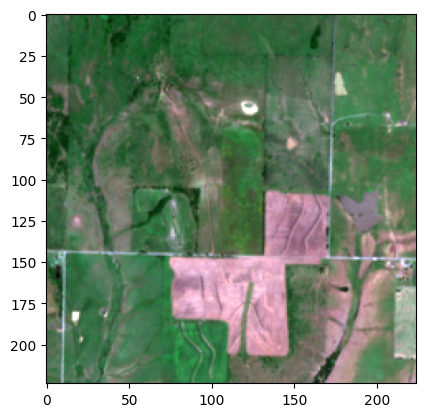

In [15]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

normalize = lambda x: (x - x.min()) / (x.max() - x.min())

image_b = normalize(io.imread(f'{OUT_DIR}/T15SUA_20220705T165849_B02_10m_normalized_chip_00000_00448.tif'))
image_g = normalize(io.imread(f'{OUT_DIR}/T15SUA_20220705T165849_B03_10m_normalized_chip_00000_00448.tif'))
image_r = normalize(io.imread(f'{OUT_DIR}/T15SUA_20220705T165849_B04_10m_normalized_chip_00000_00448.tif'))
L = 1.5
image = np.stack([image_r * L, image_g * L, image_b * L], axis=2)
plt.imshow(image)
image.max()

## Extract ResNet-50 Features from Each Chip

In [16]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained = True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50 = resnet50.eval().to(device)
# Remove final classification layer
resnet50.fc = torch.nn.Identity()

Using cuda for inference


Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [17]:
from torchvision import transforms
from PIL import Image

def load_and_preprocess_image(image_path):
    # Define the transformation - resize to 256, center crop to 224, and then normalize
    preprocess = transforms.Compose([
        # transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Open the image
    image = Image.open(image_path).convert('RGB')

    # Apply the transformations and add a batch dimension
    image_tensor = preprocess(image).unsqueeze(0)  # add batch dimension

    return image_tensor

def get_features(image_path):
    x = load_and_preprocess_image(image_path)
    x = x.cuda()
    # inference
    features = resnet50(x)
    return features.cpu().detach().numpy()

In [18]:
# import glob

# all_images = sorted(glob.glob('output_images_all/*')) # will load all image file paths in all_images

# features_list = []
# with torch.no_grad():
#     for image_path in tqdm.tqdm(all_images):
#         features = get_features(image_path)
#         features_list.append(features)

## Created a Dataset to Include all the Normalized Chips

In [19]:
from torch.utils.data import Dataset
from torchvision import transforms
from skimage import io
import torch
import numpy as np

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained = True)
# utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50 = resnet50.eval().to(device)
# Remove final classification layer
resnet50.fc = torch.nn.Identity()
# print(resnet50)
class SentinelDataset(Dataset):
    def __init__(self):
        self.images_b = io.imread_collection(f'{OUT_DIR}/*_B02_10m_normalized_chip_*_*.tif')
        self.images_g = io.imread_collection(f'{OUT_DIR}/*_B03_10m_normalized_chip_*_*.tif')
        self.images_r = io.imread_collection(f'{OUT_DIR}/*_B04_10m_normalized_chip_*_*.tif')

    def __getitem__(self, index):
        r = self.images_r[index]
        g = self.images_g[index]
        b = self.images_b[index]

        rgb = torch.tensor(np.stack([r, g, b], axis=0))
        preprocess = transforms.Compose([
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
        ])
        return preprocess(rgb)

    def __len__(self):
        return len(self.images_b)
    
dataset = SentinelDataset()

Using cuda for inference


Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


## Pass all the Normalized Chips through the ResNet-50 Model

In [20]:
import time
import tqdm
from torch.utils.data import DataLoader

BATCH_SIZE = 8
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

start_time = time.time()

features_list = []
with torch.no_grad():
    for _, images in tqdm.tqdm(enumerate(loader), total=(len(dataset) // BATCH_SIZE + 1)):
        x = images.to(device) # It means the entire image without batching - no batch.
        features = resnet50(x).cpu().numpy()
        features_list.append(features)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

  0%|          | 0/10313 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [21]:
import pandas as pd
FEATURES_CSV = 'df_features_all.csv'

all_features = np.concatenate(features_list)
df_features = pd.DataFrame(all_features)
df_features.columns = [f'feature_{i}' for i in range(2048)]
df_features.index = dataset.images_r.files
df_features.to_csv(FEATURES_CSV) 

ValueError: need at least one array to concatenate

In [22]:
import pandas as pd
df_features = pd.read_csv(FEATURES_CSV)

In [23]:
df_features

Unnamed: 0  feature_0  \
0      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
1      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
2      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
3      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
4      /home/jovyan/output_images_all/T15SUA_20220705...   0.149993   
...                                                  ...        ...   
82495  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82496  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82497  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82498  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82499  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       0.012550   0.212394   0.020993   1.633729   1.668851   0.000000   
1       0.000000   0.000089   0.000000   0.388305   2.292640   0.000000   
2       0.000000   0.013211   0.051255   0.391074   3.104864   0.000000   
3       0.000000   0.093211   0.030976   0.787083   0.817872   0.000000   
4       0.018282   0.067738   0.012542   0.000000   1.272607   0.076134   
...          ...        ...        ...        ...        ...        ...   
82495   0.000000   0.000000   0.000000   0.305571   0.737371   0.000000   
82496   0.000000   0.000000   0.007725   0.391874   0.899559   0.000000   
82497   0.000000   0.000000   0.000000   0.000000   0.060605   0.000000   
82498   0.000000   0.000000   0.000000   0.131605   0.441609   0.000000   
82499   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

       feature_7  feature_8  ...  feature_2038  feature_2039  feature_2040  \
0       0.058694   0.000000  ...      0.030422      0.152147      0.010425   
1       0.000000   0.000000  ...      0.000000      0.001860      0.000000   
2       0.069150   0.000588  ...      0.042275      0.000000      0.035438   
3       0.021972   0.018379  ...      0.192246      0.000000      0.000000   
4       0.014525   0.002239  ...      0.000000      0.075501      0.000000   
...          ...        ...  ...           ...           ...           ...   
82495   0.000000   0.000000  ...      0.000000      0.000000      0.000000   
82496   0.000000   0.000000  ...      0.000000      0.000000      0.000000   
82497   0.001332   0.000000  ...      0.000000      0.000000      0.000000   
82498   0.000000   0.000000  ...      0.000000      0.000000      0.000000   
82499   0.000000   0.000000  ...      0.000000      0.000000      0.000000   

       feature_2041  feature_2042  feature_2043  feature_2044  feature_2045  \
0          0.000000      0.100626      0.000000      0.608456      0.020677   
1          0.000000      0.000000      0.028476      0.215358      0.078137   
2          0.007040      0.000000      0.000000      0.000000      0.000000   
3          0.000000      0.000000      0.013452      0.127253      0.000000   
4          0.044226      0.000000      0.066295      0.957013      0.000000   
...             ...           ...           ...           ...           ...   
82495      0.000000      0.000000      0.143660      0.004014      0.000000   
82496      0.000000      0.000000      0.059408      0.000000      0.000000   
82497      0.000000      0.000000      0.005365      0.000000      0.000000   
82498      0.000000      0.000000      0.167057      0.000000      0.000000   
82499      0.000000      0.000000      0.191865      0.000000      0.000000   

       feature_2046  feature_2047  
0          0.589295      0.977165  
1          0.096382      0.440018  
2          0.000000      0.024606  
3          0.027488      0.405896  
4          0.000109      0.261006  
...             ...           ...  
82495      0.000000      0.007474  
82496      0.000000      0.000000  
82497      0.000000      0.000000  
82498      0.000000      0.010392  
82499     

## Statistical Analysis for Features

In [25]:
mean_value = df_features['feature_0'].mean()

print("Mean of 'feature_0':", mean_value)

Mean of 'feature_0': 0.04277329378995176


In [26]:
median_value = df_features['feature_0'].median()

print("Median of 'feature_0':", median_value)

Median of 'feature_0': 0.00317849365


In [27]:
mode_value = df_features['feature_0'].mode()

print("Mode of 'feature_0':", mode_value)

Mode of 'feature_0': 0    0.0
Name: feature_0, dtype: float64


In [28]:
min_value = df_features['feature_0'].min()
max_value = df_features['feature_0'].max()
data_range = max_value - min_value

print(f"Minimum value of 'feature_0': {min_value}")
print(f"Maximum value of 'feature_0': {max_value}")
print(f"Range of {data_range}: {data_range}")

Minimum value of 'feature_0': 0.0
Maximum value of 'feature_0': 1.4202236
Range of 1.4202236: 1.4202236


In [29]:
import numpy as np
import pandas as pd

# Assuming 'df_features' is our DataFrame with 2048 columns

# Calculate minimum for each column
min_values = np.min(df_features, axis=0)

# Calculate maximum for each column
max_values = np.max(df_features, axis=0)

# Calculate range (max - min) for each column
# range_values = np.ptp(df_features, axis=0)

# Create a DataFrame to store the results
summary_df_features = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    #'Range': range_values
})

# Print the summary DataFrame
print(summary_df_features)


                                                            Min  \
Unnamed: 0    /home/jovyan/output_images_all/T15SUA_20220705...   
feature_0                                                   0.0   
feature_1                                                   0.0   
feature_2                                                   0.0   
feature_3                                                   0.0   
...                                                         ...   
feature_2043                                                0.0   
feature_2044                                                0.0   
feature_2045                                                0.0   
feature_2046                                                0.0   
feature_2047                                                0.0   

                                                            Max  
Unnamed: 0    /home/jovyan/output_images_all/T16SCG_20220813...  
feature_0                                              1.420224

## Created Histograms for the 2,048 Features and Saved them in a File

In [30]:
%pip install gdal

Note: you may need to restart the kernel to use updated packages.


In [31]:
# import numpy as np
# import matplotlib.pyplot as plt

# bin_width = 0.05

# for i in range(2048):
#     feature_name = f'feature_{i}'
    
#     # Generate histogram
#     hist, bin_edges = np.histogram(df_features[feature_name], bins=int(1 / bin_width), range=(0, 1), density=True)
    
#     # Plot the histogram
#     plt.bar(bin_edges[:-1], hist, width=bin_width)
    
#     plt.title(f'Histogram of {feature_name}')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')

#     # Define a file name to save the histogram
#     file_name = f'histogram_{i}.png'
    
#     if i < 3:
#         plt.show() 

#     # Save the histogram to a file (e.g., as a PNG image)
#     plt.savefig(f'histograms/histogram_{feature_name}.png')
    
#     # Clear the current plot for the next iteration
#     plt.clf()

#     print(f'Saved histogram for {feature_name} as {file_name}')


In [32]:
#import numpy as np
#import matplotlib.pyplot as plt

#bin_width = 0.05

#for i in range(2048):
    #feature_name = f'feature_{i+1}'  # Assuming feature names are like feature_1, feature_2, ...
    
    # Calculate the histogram
    #hist, edges = np.histogram(df_features[feature_name], bins=int(1 / bin_width), range=(0, 1), density=True)
    
    # Plot the histogram
    #plt.bar(edges[:-1], hist, width=bin_width)
    
    #plt.title(f'Histogram of {feature_name}')
    #plt.xlabel('Value')
    #plt.ylabel('Frequency')
    
    # Define a file name to save the histogram
    #file_name = f'histogram_{i+1}.png'
    
    # Save the histogram to a file
    #plt.savefig(file_name)
    
    # Clear the current plot for the next iteration
    #plt.clf()

    #print(f'Saved histogram for {feature_name} as {file_name}')


## Conducting KL-Divergence for all the Histograms Created

In [33]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# Calculate KL divergences
kl_divergences = []

for i in tqdm.tqdm(range(2048)):
    for j in range(i+1, 2048):
        
        hist_i, _ = np.histogram(df_features[f'feature_{i}'], bins=np.linspace(0, 5, 500))
        hist_j, _ = np.histogram(df_features[f'feature_{j}'], bins=np.linspace(0, 5, 500))

        kl_value = kl_divergence(hist_i, hist_j)
        
        kl_divergences.append((i, j, kl_value))

# Sort the list of KL divergences
kl_divergences.sort(key=lambda x: x[2])

# Print the top 10 pairs with the smallest KL divergences
for i, j, kl_value in kl_divergences[:10]:
    print(f'KL Divergence between feature_{i} and feature_{j}: {kl_value}')



In [60]:
df_features.shape

(82500, 2051)

## Convert the Image Chips into Polygons

### Extracting Longitude and Latitude from the jp2 Image

In [34]:
df_features.columns = ['file', *df_features.columns[1:]]
def get_original_jp2(chip):
    return chip.replace('/home/jovyan/output_images_all/', '/data/obesity-images/all/').split('_normalized')[0] + '.jp2'
df_features['jp2'] = df_features['file'].apply(get_original_jp2)

In [80]:
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
import functools

@functools.lru_cache(None)
def get_coords(jp2_file_path):
    # jp2_file_path = '/data/JAMIA/T15SWD_20230829T165849_B02_10m.jp2'
    with rasterio.open(jp2_file_path) as dataset:
        # Assuming the image is georeferenced, this will get the bounds
        bounds = dataset.bounds
        x1, y1, x2, y2 = bounds.left, bounds.top, bounds.right, bounds.bottom
        w, h = dataset.width, dataset.height
    return x1, y1, x2, y2, w, h


In [81]:
x1, y1, x2, y2, w, h = get_coords('/data/JAMIA/T15SWD_20230829T165849_B02_10m.jp2')

In [82]:
df_features['image_coords'] = df_features['jp2'].apply(get_coords)

In [72]:
!ln /data/obesity-images/*/*.jp2 /data/obesity-images/all

In [87]:
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from pyproj import Transformer

# Define transformer to convert from UTM zone 15N to WGS 84
transformer = Transformer.from_crs(dataset.crs, "epsg:4326", always_xy=True)

# jp2_file_path = '/data/JAMIA/T15SWD_20230829T165849_B02_10m.jp2'

# with rasterio.open(jp2_file_path) as dataset:
#     # Assuming the image is georeferenced, this will get the bounds
#     bounds = dataset.bounds
#     x1, y1, x2, y2 = bounds.left, bounds.top, bounds.right, bounds.bottom
#     w, h = dataset.width, dataset.height


# Modify the get_lat_lon function to return a Polygon
def get_lat_lon(f):
    jp2 = get_original_jp2(f)
    x1, y1, x2, y2, w, h = get_coords(jp2)

    resolution_x = (x2 - x1) / w
    resolution_y = (y2 - y1) / h

    x, y = f[-15:-4].split('_')
    x, y = int(x), int(y)
    lon1 = x1 + resolution_x * x
    lat1 = y1 + resolution_y * y
    lon2 = lon1 + 224 * resolution_x
    lat2 = lat1 + 224 * resolution_y
    
    # Transform the coordinates
    lon1, lat1 = transformer.transform(lon1, lat1)
    lon2, lat2 = transformer.transform(lon2, lat2)

    # Create a Polygon object
    return Polygon([(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)])

# Apply the function to the 'file' column
df_features['geometry'] = df_features.iloc[:, 0].apply(get_lat_lon, )

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df_features, geometry='geometry')

gdf.to_csv('chips-features-polygons.csv')

# Example usage
gdf.head()

file  feature_0  feature_1  \
0  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   0.012550   
1  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   0.000000   
2  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   0.000000   
3  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   0.000000   
4  /home/jovyan/output_images_all/T15SUA_20220705...   0.149993   0.018282   

   feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0   0.212394   0.020993   1.633729   1.668851   0.000000   0.058694   
1   0.000089   0.000000   0.388305   2.292640   0.000000   0.000000   
2   0.013211   0.051255   0.391074   3.104864   0.000000   0.069150   
3   0.093211   0.030976   0.787083   0.817872   0.000000   0.021972   
4   0.067738   0.012542   0.000000   1.272607   0.076134   0.014525   

   feature_8  ...  feature_2041  feature_2042  feature_2043  feature_2044  \
0   0.000000  ...      0.000000      0.100626      0.000000      0.608456   
1   0.000000  ...      0.000000      0.000000      0.028476      0.215358   
2   0.000588  ...      0.007040      0.000000      0.000000      0.000000   
3   0.018379  ...      0.000000      0.000000      0.013452      0.127253   
4   0.002239  ...      0.044226      0.000000      0.066295      0.957013   

   feature_2045  feature_2046  feature_2047  \
0      0.020677      0.589295      0.977165   
1      0.078137      0.096382      0.440018   
2      0.000000      0.000000      0.024606   
3      0.000000      0.027488      0.405896   
4      0.000000      0.000109      0.261006   

                                                 jp2  \
0  /data/obesity-images/all/T15SUA_20220705T16584...   
1  /data/obesity-images/all/T15SUA_20220705T16584...   
2  /data/obesity-images/all/T15SUA_20220705T16584...   
3  /data/obesity-images/all/T15SUA_20220705T16584...   
4  /data/obesity-images/all/T15SUA_20220705T16584...   

                                            geometry  \
0  POLYGON ((-95.24838 37.02528, -95.22263 37.025...   
1  POLYGON ((-95.24779 37.00510, -95.22204 37.005...   
2  POLYGON ((-95.24719 36.98492, -95.22145 36.984...   
3  POLYGON ((-95.24660 36.96475, -95.22087 36.964...   
4  POLYGON ((-95.24600 36.94457, -95.22028 36.944...   

                                        image_coords  
0  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
1  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
2  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
3  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
4  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  

[5 rows x 2052 columns]

In [35]:
gdf = pd.read_csv('chips-features-polygons.csv')

# Example usage
gdf.head()

Unnamed: 0                                               file  feature_0  \
0           0  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
1           1  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
2           2  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
3           3  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
4           4  /home/jovyan/output_images_all/T15SUA_20220705...   0.149993   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.012550   0.212394   0.020993   1.633729   1.668851   0.000000   
1   0.000000   0.000089   0.000000   0.388305   2.292640   0.000000   
2   0.000000   0.013211   0.051255   0.391074   3.104864   0.000000   
3   0.000000   0.093211   0.030976   0.787083   0.817872   0.000000   
4   0.018282   0.067738   0.012542   0.000000   1.272607   0.076134   

   feature_7  ...  feature_2041  feature_2042  feature_2043  feature_2044  \
0   0.058694  ...      0.000000      0.100626      0.000000      0.608456   
1   0.000000  ...      0.000000      0.000000      0.028476      0.215358   
2   0.069150  ...      0.007040      0.000000      0.000000      0.000000   
3   0.021972  ...      0.000000      0.000000      0.013452      0.127253   
4   0.014525  ...      0.044226      0.000000      0.066295      0.957013   

   feature_2045  feature_2046  feature_2047  \
0      0.020677      0.589295      0.977165   
1      0.078137      0.096382      0.440018   
2      0.000000      0.000000      0.024606   
3      0.000000      0.027488      0.405896   
4      0.000000      0.000109      0.261006   

                                                 jp2  \
0  /data/obesity-images/all/T15SUA_20220705T16584...   
1  /data/obesity-images/all/T15SUA_20220705T16584...   
2  /data/obesity-images/all/T15SUA_20220705T16584...   
3  /data/obesity-images/all/T15SUA_20220705T16584...   
4  /data/obesity-images/all/T15SUA_20220705T16584...   

                                            geometry  \
0  POLYGON ((-95.24837990394671 37.02527578521076...   
1  POLYGON ((-95.24778526126155 37.00509909791619...   
2  POLYGON ((-95.24719121041963 36.98492233367489...   
3  POLYGON ((-95.24659775080694 36.96474549251076...   
4  POLYGON ((-95.24600488181039 36.9445685744476,...   

                                        image_coords  
0  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
1  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
2  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
3  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
4  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  

[5 rows x 2053 columns]

In [39]:
from shapely import wkt
import geopandas as gpd

obesity_df = pd.read_csv('final-original.csv')
obesity_df.index = obesity_df['Unnamed: 0']
obesity_df = obesity_df.drop('Unnamed: 0', axis=1)

def maybe_wkt_load(inp):
    try:
        return wkt.loads(inp)
    except Exception:
        # print('failed')
        return None
# obesity_df['geometry'] = obesity_df['geometry'].apply(maybe_wkt_load)
obesity_df['geometry'] = obesity_df['geometry'].apply(wkt.loads) 
obesity_gdf = gpd.GeoDataFrame(obesity_df, crs='epsg:4326') 


<Axes: >

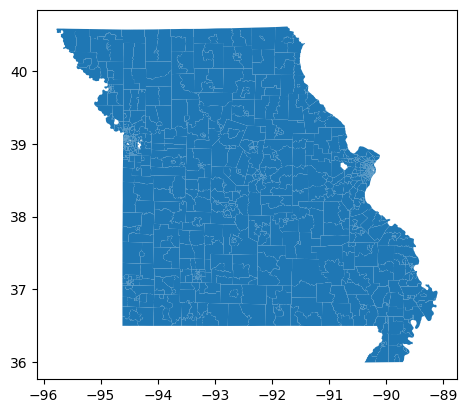

In [40]:
obesity_gdf.plot()

In [41]:
obesity_gdf = obesity_gdf[obesity_gdf['geometry'].apply(lambda x: x is not None)] 

In [42]:
obesity_gdf.shape

(1055, 6)

In [43]:
# Features per chip polygon

gdf.head()

Unnamed: 0                                               file  feature_0  \
0           0  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
1           1  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
2           2  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
3           3  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
4           4  /home/jovyan/output_images_all/T15SUA_20220705...   0.149993   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.012550   0.212394   0.020993   1.633729   1.668851   0.000000   
1   0.000000   0.000089   0.000000   0.388305   2.292640   0.000000   
2   0.000000   0.013211   0.051255   0.391074   3.104864   0.000000   
3   0.000000   0.093211   0.030976   0.787083   0.817872   0.000000   
4   0.018282   0.067738   0.012542   0.000000   1.272607   0.076134   

   feature_7  ...  feature_2041  feature_2042  feature_2043  feature_2044  \
0   0.058694  ...      0.000000      0.100626      0.000000      0.608456   
1   0.000000  ...      0.000000      0.000000      0.028476      0.215358   
2   0.069150  ...      0.007040      0.000000      0.000000      0.000000   
3   0.021972  ...      0.000000      0.000000      0.013452      0.127253   
4   0.014525  ...      0.044226      0.000000      0.066295      0.957013   

   feature_2045  feature_2046  feature_2047  \
0      0.020677      0.589295      0.977165   
1      0.078137      0.096382      0.440018   
2      0.000000      0.000000      0.024606   
3      0.000000      0.027488      0.405896   
4      0.000000      0.000109      0.261006   

                                                 jp2  \
0  /data/obesity-images/all/T15SUA_20220705T16584...   
1  /data/obesity-images/all/T15SUA_20220705T16584...   
2  /data/obesity-images/all/T15SUA_20220705T16584...   
3  /data/obesity-images/all/T15SUA_20220705T16584...   
4  /data/obesity-images/all/T15SUA_20220705T16584...   

                                            geometry  \
0  POLYGON ((-95.24837990394671 37.02527578521076...   
1  POLYGON ((-95.24778526126155 37.00509909791619...   
2  POLYGON ((-95.24719121041963 36.98492233367489...   
3  POLYGON ((-95.24659775080694 36.96474549251076...   
4  POLYGON ((-95.24600488181039 36.9445685744476,...   

                                        image_coords  
0  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
1  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
2  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
3  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  
4  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...  

[5 rows x 2053 columns]

In [44]:
obesity_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
obesity_gdf_4 = obesity_gdf.to_crs(epsg='26915')
obesity_gdf_4["area"] = obesity_gdf_4["geometry"].area / 1000000
obesity_gdf_4.head()

CountyName  TotalPopulation  OBESITY_CrudePrev    TractFIPS  \
Unnamed: 0                                                               
0               Adair             3802               35.9  29001950100   
1               Adair             3019               37.0  29001950200   
2               Adair             2951               36.7  29001950300   
3               Adair             3892               34.5  29001950400   
4               Adair             7079               33.5  29001950500   

                  GEOID                                           geometry  \
Unnamed: 0                                                                   
0           29001950100  POLYGON ((528725.181 4461828.552, 528726.749 4...   
1           29001950200  POLYGON ((512249.152 4434522.888, 512249.142 4...   
2           29001950300  POLYGON ((527058.784 4454007.289, 527059.023 4...   
3           29001950400  POLYGON ((535504.322 4452071.542, 535503.854 4...   
4           29001950500  POLYGON ((535759.533 4447713.782, 535776.393 4...   

                  area  
Unnamed: 0              
0           657.967390  
1           701.742156  
2            21.057493  
3            19.687365  
4            71.325535

In [46]:
obesity_gdf_4.reset_index(inplace=True)
obesity_gdf_4.head()

Unnamed: 0 CountyName  TotalPopulation  OBESITY_CrudePrev    TractFIPS  \
0           0      Adair             3802               35.9  29001950100   
1           1      Adair             3019               37.0  29001950200   
2           2      Adair             2951               36.7  29001950300   
3           3      Adair             3892               34.5  29001950400   
4           4      Adair             7079               33.5  29001950500   

         GEOID                                           geometry        area  
0  29001950100  POLYGON ((528725.181 4461828.552, 528726.749 4...  657.967390  
1  29001950200  POLYGON ((512249.152 4434522.888, 512249.142 4...  701.742156  
2  29001950300  POLYGON ((527058.784 4454007.289, 527059.023 4...   21.057493  
3  29001950400  POLYGON ((535504.322 4452071.542, 535503.854 4...   19.687365  
4  29001950500  POLYGON ((535759.533 4447713.782, 535776.393 4...   71.325535

In [47]:
# obesity_gdf_5 = obesity_gdf_4[obesity_gdf_4["CountyName"] == "Boone"]
# obesity_gdf_5.head()

In [48]:
obs_area = obesity_gdf_4[["GEOID", "TotalPopulation", "area", "OBESITY_CrudePrev"]]
#obs_area = obs_area[obs_area["CountyName"] == "Boone"]
obs_area.head()

GEOID  TotalPopulation        area  OBESITY_CrudePrev
0  29001950100             3802  657.967390               35.9
1  29001950200             3019  701.742156               37.0
2  29001950300             2951   21.057493               36.7
3  29001950400             3892   19.687365               34.5
4  29001950500             7079   71.325535               33.5

In [49]:
obesity_gdf

CountyName  TotalPopulation  OBESITY_CrudePrev    TractFIPS  \
Unnamed: 0                                                                    
0                    Adair             3802               35.9  29001950100   
1                    Adair             3019               37.0  29001950200   
2                    Adair             2951               36.7  29001950300   
3                    Adair             3892               34.5  29001950400   
4                    Adair             7079               33.5  29001950500   
...                    ...              ...                ...          ...   
1050        St. Louis City             4075               31.8  29510127200   
1051        St. Louis City             3769               36.2  29510127300   
1052        St. Louis City             4795               41.4  29510127400   
1053        St. Louis City             2237               40.6  29510127500   
1054        St. Louis City             3239               30.1  29510127600   

                  GEOID                                           geometry  
Unnamed: 0                                                                  
0           29001950100  POLYGON ((-92.66196 40.30647, -92.66195 40.306...  
1           29001950200  POLYGON ((-92.85637 40.06087, -92.85637 40.060...  
2           29001950300  POLYGON ((-92.68191 40.23607, -92.68190 40.236...  
3           29001950400  POLYGON ((-92.58273 40.21831, -92.58273 40.218...  
4           29001950500  POLYGON ((-92.57997 40.17904, -92.57978 40.179...  
...                 ...                                                ...  
1050        29510127200  POLYGON ((-90.29184 38.60237, -90.29184 38.602...  
1051        29510127300  POLYGON ((-90.24539 38.61477, -90.24525 38.615...  
1052        29510127400  POLYGON ((-90.22629 38.61937, -90.22624 38.619...  
1053        29510127500  POLYGON ((-90.21853 38.63329, -90.21844 38.633...  
1054        29510127600  POLYGON ((-90.21346 38.60031, -90.21336 38.600...  

[1055 rows x 6 columns]

In [50]:
# Obesity rates per census tract polygon

obesity_gdf[['OBESITY_CrudePrev', 'geometry', 'GEOID']]

OBESITY_CrudePrev  \
Unnamed: 0                      
0                        35.9   
1                        37.0   
2                        36.7   
3                        34.5   
4                        33.5   
...                       ...   
1050                     31.8   
1051                     36.2   
1052                     41.4   
1053                     40.6   
1054                     30.1   

                                                     geometry        GEOID  
Unnamed: 0                                                                  
0           POLYGON ((-92.66196 40.30647, -92.66195 40.306...  29001950100  
1           POLYGON ((-92.85637 40.06087, -92.85637 40.060...  29001950200  
2           POLYGON ((-92.68191 40.23607, -92.68190 40.236...  29001950300  
3           POLYGON ((-92.58273 40.21831, -92.58273 40.218...  29001950400  
4           POLYGON ((-92.57997 40.17904, -92.57978 40.179...  29001950500  
...                                                       ...          ...  
1050        POLYGON ((-90.29184 38.60237, -90.29184 38.602...  29510127200  
1051        POLYGON ((-90.24539 38.61477, -90.24525 38.615...  29510127300  
1052        POLYGON ((-90.22629 38.61937, -90.22624 38.619...  29510127400  
1053        POLYGON ((-90.21853 38.63329, -90.21844 38.633...  29510127500  
1054        POLYGON ((-90.21346 38.60031, -90.21336 38.600...  29510127600  

[1055 rows x 3 columns]

In [51]:
# Obesity rates per census tract polygon

obesity_gdf[['OBESITY_CrudePrev', 'geometry', 'GEOID']]

OBESITY_CrudePrev  \
Unnamed: 0                      
0                        35.9   
1                        37.0   
2                        36.7   
3                        34.5   
4                        33.5   
...                       ...   
1050                     31.8   
1051                     36.2   
1052                     41.4   
1053                     40.6   
1054                     30.1   

                                                     geometry        GEOID  
Unnamed: 0                                                                  
0           POLYGON ((-92.66196 40.30647, -92.66195 40.306...  29001950100  
1           POLYGON ((-92.85637 40.06087, -92.85637 40.060...  29001950200  
2           POLYGON ((-92.68191 40.23607, -92.68190 40.236...  29001950300  
3           POLYGON ((-92.58273 40.21831, -92.58273 40.218...  29001950400  
4           POLYGON ((-92.57997 40.17904, -92.57978 40.179...  29001950500  
...                                                       ...          ...  
1050        POLYGON ((-90.29184 38.60237, -90.29184 38.602...  29510127200  
1051        POLYGON ((-90.24539 38.61477, -90.24525 38.615...  29510127300  
1052        POLYGON ((-90.22629 38.61937, -90.22624 38.619...  29510127400  
1053        POLYGON ((-90.21853 38.63329, -90.21844 38.633...  29510127500  
1054        POLYGON ((-90.21346 38.60031, -90.21336 38.600...  29510127600  

[1055 rows x 3 columns]

In [52]:
import matplotlib.pyplot as plt

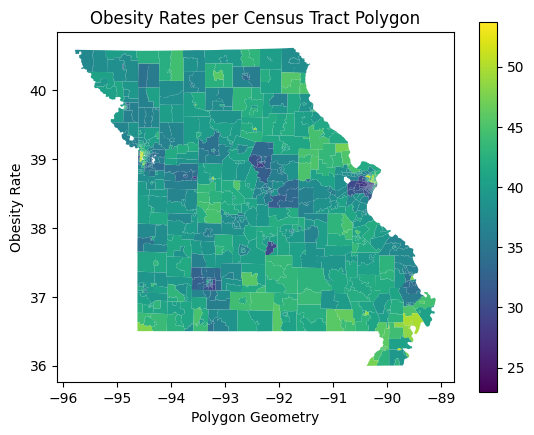

In [53]:
# obesity_gdf.plot('GEOID')

fig, ax = plt.subplots(1, 1)
obesity_gdf.plot(column='OBESITY_CrudePrev', ax=ax, legend=True)

ax.set_xlabel('Polygon Geometry')
ax.set_ylabel('Obesity Rate') 

ax.set_title('Obesity Rates per Census Tract Polygon')

plt.show()


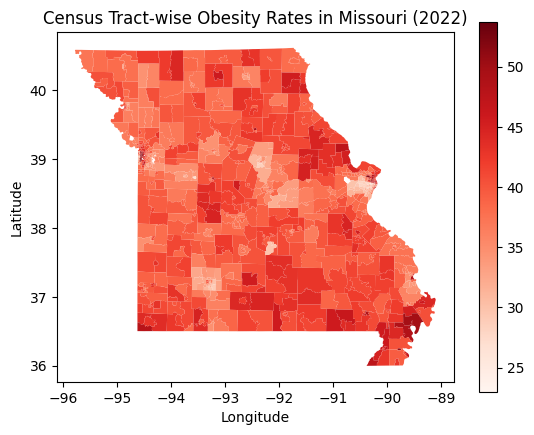

In [54]:

fig, ax = plt.subplots(1, 1)
obesity_gdf.plot(column='OBESITY_CrudePrev', ax=ax, legend=True, cmap="Reds")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# legend = ax.get_legend()
# legend.set_title('Obesity per 100k')
# ax.set_title(label='Obesity Rate per 100k')

# ax.set_title('Obesity Rates per Census Tract Polygon') # Census Tract-wise Obesity Rates in Missouri 
ax.set_title('Census Tract-wise Obesity Rates in Missouri (2022)') 
plt.show()

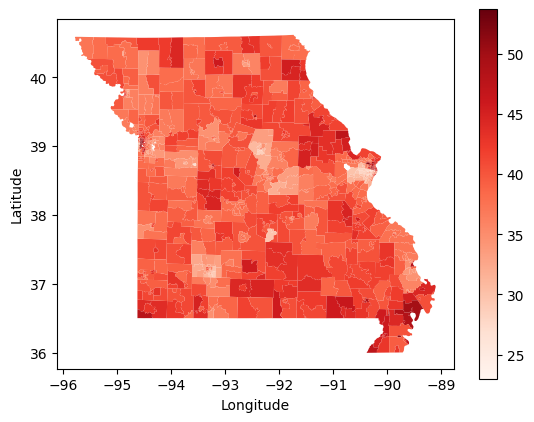

In [55]:

fig, ax = plt.subplots(1, 1)
obesity_gdf.plot(column='OBESITY_CrudePrev', ax=ax, legend=True, cmap="Reds")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# legend = ax.get_legend()
# legend.set_title('Obesity per 100k')
# ax.set_title(label='Obesity Rate per 100k')

# ax.set_title('Obesity Rates per Census Tract Polygon') # Census Tract-wise Obesity Rates in Missouri 
# ax.set_title('Census Tract-wise Obesity Rates in Missouri (2022)') 
plt.show()

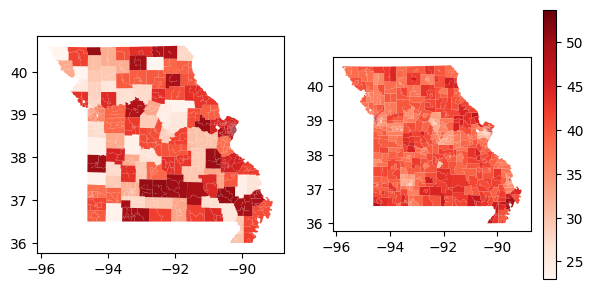

In [56]:

fig, ax = plt.subplots(1, 2, figsize=(7,3.5))
obesity_gdf.plot(ax=ax[0], legend=True, cmap="Reds")
obesity_gdf.plot(ax=ax[1], column='OBESITY_CrudePrev', legend=True, cmap="Reds")

# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# ax.set_title('Obesity Rates per Census Tract Polygon')

plt.show()

# Joining the Census Tract Polygon and the Chips Polygon Tables

In [103]:
# Left spatial join

obesity_gdf['OBESITY_CrudePrev'] = obesity_gdf['OBESITY_CrudePrev'].apply(float)
joined_gdf = gpd.sjoin(gdf, obesity_gdf[['OBESITY_CrudePrev', 'geometry', 'GEOID']], how='left', predicate='intersects',)
# joined_gdf[['file', 'OBESITY_CrudePrev']].groupby('file').mean()

joined_gdf

/tmp/ipykernel_747/1453660339.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(gdf, obesity_gdf[['OBESITY_CrudePrev', 'geometry', 'GEOID']], how='left', predicate='intersects',)


file  feature_0  \
0      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
1      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
2      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
3      /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
4      /home/jovyan/output_images_all/T15SUA_20220705...   0.149993   
...                                                  ...        ...   
82496  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82497  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82497  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82498  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   
82499  /home/jovyan/output_images_all/T16SCG_20220813...   0.000000   

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       0.012550   0.212394   0.020993   1.633729   1.668851   0.000000   
1       0.000000   0.000089   0.000000   0.388305   2.292640   0.000000   
2       0.000000   0.013211   0.051255   0.391074   3.104864   0.000000   
3       0.000000   0.093211   0.030976   0.787083   0.817872   0.000000   
4       0.018282   0.067738   0.012542   0.000000   1.272607   0.076134   
...          ...        ...        ...        ...        ...        ...   
82496   0.000000   0.000000   0.007725   0.391874   0.899559   0.000000   
82497   0.000000   0.000000   0.000000   0.000000   0.060605   0.000000   
82497   0.000000   0.000000   0.000000   0.000000   0.060605   0.000000   
82498   0.000000   0.000000   0.000000   0.131605   0.441609   0.000000   
82499   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

       feature_7  feature_8  ...  feature_2044  feature_2045  feature_2046  \
0       0.058694   0.000000  ...      0.608456      0.020677      0.589295   
1       0.000000   0.000000  ...      0.215358      0.078137      0.096382   
2       0.069150   0.000588  ...      0.000000      0.000000      0.000000   
3       0.021972   0.018379  ...      0.127253      0.000000      0.027488   
4       0.014525   0.002239  ...      0.957013      0.000000      0.000109   
...          ...        ...  ...           ...           ...           ...   
82496   0.000000   0.000000  ...      0.000000      0.000000      0.000000   
82497   0.001332   0.000000  ...      0.000000      0.000000      0.000000   
82497   0.001332   0.000000  ...      0.000000      0.000000      0.000000   
82498   0.000000   0.000000  ...      0.000000      0.000000      0.000000   
82499   0.000000   0.000000  ...      0.000000      0.000000      0.000000   

       feature_2047                                                jp2  \
0          0.977165  /data/obesity-images/all/T15SUA_20220705T16584...   
1          0.440018  /data/obesity-images/all/T15SUA_20220705T16584...   
2          0.024606  /data/obesity-images/all/T15SUA_20220705T16584...   
3          0.405896  /data/obesity-images/all/T15SUA_20220705T16584...   
4          0.261006  /data/obesity-images/all/T15SUA_20220705T16584...   
...             ...                                                ...   
82496      0.000000  /data/obesity-images/all/T16SCG_20220813T16391...   
82497      0.000000  /data/obesity-images/all/T16SCG_20220813T16391...   
82497      0.000000  /data/obesity-images/all/T16SCG_20220813T16391...   
82498      0.010392  /data/obesity-images/all/T16SCG_20220813T16391...   
82499      0.000000  /data/obesity-images/all/T16SCG_20220813T16391...   

                                                geometry  \
0      POLYGON ((-95.24838 37.02528, -95.22263 37.025...   
1      POLYGON ((-95.24779 37.00510, -95.22204 37.005...   
2      POLYGON ((-95.24719 36.98492, -95.22145 36.984...   
3      POLYGON ((-95.24660 36.96475, -95.22087 36.964...   
4      POLYGON ((-95.24600 36.94457, -95.22028 36.944...   
...                                                  ...   
82496  POLYGON ((-94.01438 37.01448, -93.98895 37.01

In [104]:
# Save the joined gdf as csv file

joined_gdf.to_csv('all_joined_gdf.csv')

In [57]:
joined_gdf = pd.read_csv('all_joined_gdf.csv')

AttributeError: Line2D.set() got an unexpected keyword argument 'facecolor'

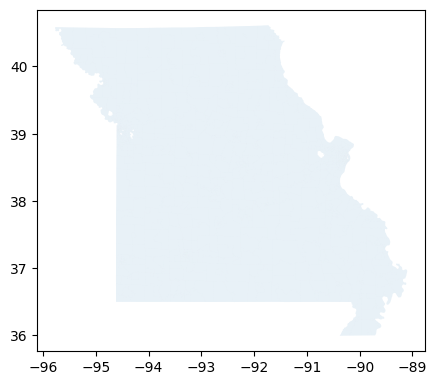

In [58]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_aspect('equal', adjustable='box')

obesity_gdf.plot(alpha=0.1, ax=ax)
gdf.plot(ax=ax, facecolor='green')

ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude')

ax.set_title('Sentinel-2 Image within Missouri')

plt.show()

# ax.equal_axis(True)
# plt.ylim(39.6, 39.7)
# plt.xlim(-93.0, -92.8)

In [82]:
joined_gdf = joined_gdf.sort_values('file')

In [83]:
joined_gdf[[
    'GEOID', 'index_right'
]].groupby('GEOID').count().to_csv('num_chips_per_ct.csv')

KeyboardInterrupt: 

In [88]:
# joined_gdf.groupby('GEOID').count()

AttributeError: Line2D.set() got an unexpected keyword argument 'facecolor'

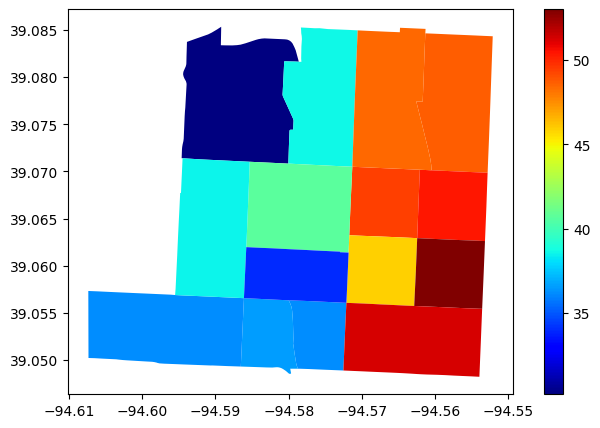

In [91]:
# The chip with the most intersections
joined_gdf_1 = joined_gdf[joined_gdf['file'] == '/home/jovyan/output_images_all/T15SUD_20220710T165911_B04_10m_normalized_chip_06272_07392.tif']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_aspect('equal', adjustable='box')

obesity_gdf.loc[joined_gdf_1['index_right'].values].plot('OBESITY_CrudePrev', cmap='jet', ax=ax, legend=True)
joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='w')

ax.set_title(f'Average {joined_gdf_1["OBESITY_CrudePrev"].mean():.2f}')


In [92]:
obesity_gdf

CountyName  TotalPopulation  OBESITY_CrudePrev    TractFIPS  \
Unnamed: 0                                                                    
0                    Adair             3802               35.9  29001950100   
1                    Adair             3019               37.0  29001950200   
2                    Adair             2951               36.7  29001950300   
3                    Adair             3892               34.5  29001950400   
4                    Adair             7079               33.5  29001950500   
...                    ...              ...                ...          ...   
1050        St. Louis City             4075               31.8  29510127200   
1051        St. Louis City             3769               36.2  29510127300   
1052        St. Louis City             4795               41.4  29510127400   
1053        St. Louis City             2237               40.6  29510127500   
1054        St. Louis City             3239               30.1  29510127600   

                  GEOID                                           geometry  
Unnamed: 0                                                                  
0           29001950100  POLYGON ((-92.66196 40.30647, -92.66195 40.306...  
1           29001950200  POLYGON ((-92.85637 40.06087, -92.85637 40.060...  
2           29001950300  POLYGON ((-92.68191 40.23607, -92.68190 40.236...  
3           29001950400  POLYGON ((-92.58273 40.21831, -92.58273 40.218...  
4           29001950500  POLYGON ((-92.57997 40.17904, -92.57978 40.179...  
...                 ...                                                ...  
1050        29510127200  POLYGON ((-90.29184 38.60237, -90.29184 38.602...  
1051        29510127300  POLYGON ((-90.24539 38.61477, -90.24525 38.615...  
1052        29510127400  POLYGON ((-90.22629 38.61937, -90.22624 38.619...  
1053        29510127500  POLYGON ((-90.21853 38.63329, -90.21844 38.633...  
1054        29510127600  POLYGON ((-90.21346 38.60031, -90.21336 38.600...  

[1055 rows x 6 columns]

AttributeError: Line2D.set() got an unexpected keyword argument 'facecolor'

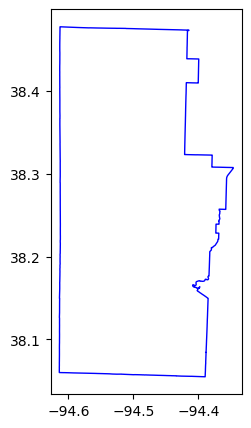

In [93]:
IDX = 30 # 608
joined_gdf_1 = joined_gdf[joined_gdf['index_right'] == IDX]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_aspect('equal', adjustable='box')

obesity_gdf[obesity_gdf.index == IDX].plot(ax=ax, legend=True, facecolor='none', edgecolor='b')
joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='g')
ax.set_title(f'Average {joined_gdf_1["OBESITY_CrudePrev"].mean():.2f}')

ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude')

ax.set_title(f'Number of Image Chips Intersecting with Census Tract ({joined_gdf_1.shape[0]} chips)' )

plt.show()



/tmp/ipykernel_747/1742289344.py:16: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row.geometry.type == 'Point':
/tmp/ipykernel_747/1742289344.py:20: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif row.geometry.type == 'Polygon':


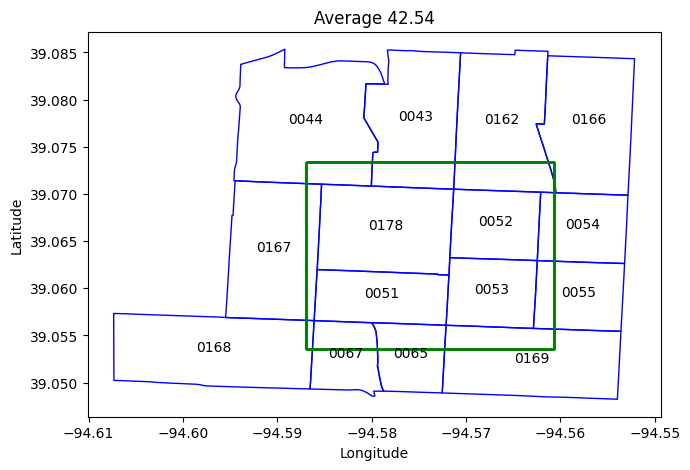

In [135]:
joined_gdf_1 = joined_gdf[
    joined_gdf['file'] == '/home/jovyan/output_images_all/T15SUD_20220710T165911_B04_10m_normalized_chip_06272_07392.tif']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_aspect('equal', adjustable='box')

obesity_gdf_1 = obesity_gdf.loc[joined_gdf_1['index_right'].values]
obesity_gdf_1["GEOID"] = obesity_gdf_1["GEOID"].astype('str') 
obesity_gdf_1["tractID"] = obesity_gdf_1["GEOID"].str[-6:-2] #Change the range whatever you want 

obesity_gdf_1.plot(ax=ax, legend=True, facecolor='none', edgecolor='b')
joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='g')
ax.set_title(f'Average {joined_gdf_1["OBESITY_CrudePrev"].mean():.2f}')

for idx, row in obesity_gdf_1.iterrows():
    # Assuming the geometries are Point. For other types, you might need to adjust this.
    if row.geometry.type == 'Point':
        plt.annotate(row['GEOID'], xy=(row.geometry.x, row.geometry.y),
                     horizontalalignment='center')
    # For Polygon geometries, you might use the centroid or another representative point
    elif row.geometry.type == 'Polygon':
        plt.annotate(row['tractID'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center')


ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude')
plt.show()


In [136]:
obesity_gdf_1.dtypes

CountyName             object
TotalPopulation         int64
OBESITY_CrudePrev     float64
TractFIPS               int64
GEOID                  object
geometry             geometry
tractID                object
dtype: object

In [137]:
obesity_gdf_1["GEOID"] = obesity_gdf_1["GEOID"].astype('str') 
obesity_gdf_1["tractID"] = obesity_gdf_1["GEOID"].str[-6:-2]
#obesity_gdf_1["area"] = obesity_gdf_1["geometry"].area
obesity_gdf_1.head()

CountyName  TotalPopulation  OBESITY_CrudePrev    TractFIPS  \
Unnamed: 0                                                               
361           Jackson             1192               49.4  29095005200   
466           Jackson             1771               48.7  29095016600   
363           Jackson              903               50.4  29095005400   
358           Jackson              875               30.2  29095004400   
357           Jackson             2168               38.6  29095004300   

                  GEOID                                           geometry  \
Unnamed: 0                                                                   
361         29095005200  POLYGON ((-94.57164 39.06484, -94.57163 39.065...   
466         29095016600  POLYGON ((-94.56258 39.07743, -94.56229 39.077...   
363         29095005400  POLYGON ((-94.56237 39.06475, -94.56228 39.066...   
358         29095004400  POLYGON ((-94.59456 39.07234, -94.59453 39.072...   
357         29095004300  POLYGON ((-94.58083 39.07818, -94.58082 39.078...   

           tractID  
Unnamed: 0          
361           0052  
466           0166  
363           0054  
358           0044  
357           0043

In [138]:
# obesity_gdf_2 = obesity_gdf_1.to_crs(epsg='26915').reset_index()
# obesity_gdf_2["area"] = obesity_gdf_2["geometry"].area/1000000
# obesity_gdf_2.head()

In [139]:
# obs_area = obesity_gdf_2[["GEOID", "TotalPopulation", "area", "OBESITY_CrudePrev"]]
# obs_area.head()

In [415]:
obs_area.shape

(1055, 4)

Text(0.5, 1.0, 'Average 39.86')

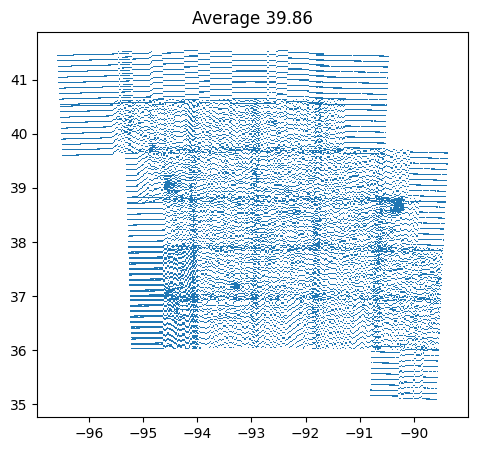

In [416]:
# The chip with the most intersections
# joined_gdf_1 = joined_gdf[joined_gdf['Unnamed: 0']]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_aspect('equal', adjustable='box')

gdf.iloc[::5].plot(ax=ax, legend=True)
# joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='w')

ax.set_title(f'Average {joined_gdf_1["OBESITY_CrudePrev"].mean():.2f}')

# Show the Census Tract Polygon (in Blue) and the Chips Polygon (in Green)

In [417]:
# chip = gdf['Unnamed: 0'][0]
def getxy(chip):
    x, y = chip[-15:-4].split('_')
    x, y = int(x), int(y)
    return x, y

def getx(chip):
    return getxy(chip)[0]

def gety(chip):
    return getxy(chip)[1]

gdf['x'] = gdf['file'].apply(getx)
gdf['y'] = gdf['file'].apply(gety)


In [418]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [419]:
%matplotlib inline

In [420]:
1

1

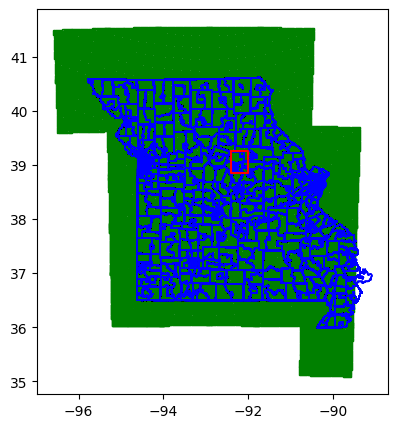

In [422]:
gdf_10 = gdf[(gdf['x'] % 1 == 0) * (gdf['y'] % 1 == 0)]
# gdf_10.plot()

# for tile in :
joined_gdf_1 = joined_gdf[joined_gdf['file'].isin(gdf_10['file'].values)]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x1, x2 = -92.4, -92
y1, y2 = 38.85, 39.25
# ax.set_xlim(x1, x2)
# ax.set_ylim(y1, y2)
joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='g')
obesity_gdf.loc[joined_gdf_1['index_right'].dropna().values].plot(
    ax=ax, legend=True, facecolor='none', edgecolor='b')
ax.plot([x1, x2, x2, x1, x1], [y2, y2, y1, y1, y2], c='r')
# ax.set_aspect('equal', adjustable='box')


<Axes: >

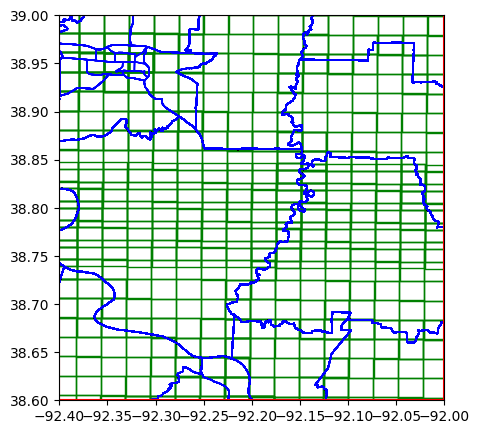

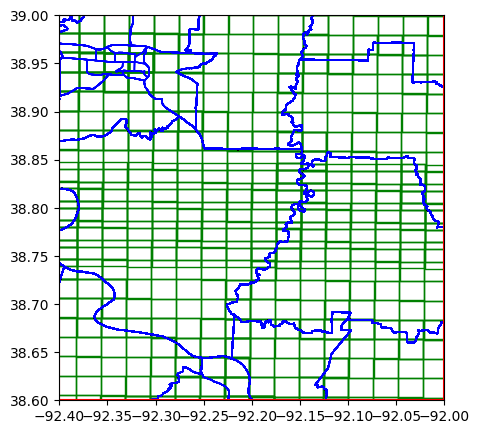

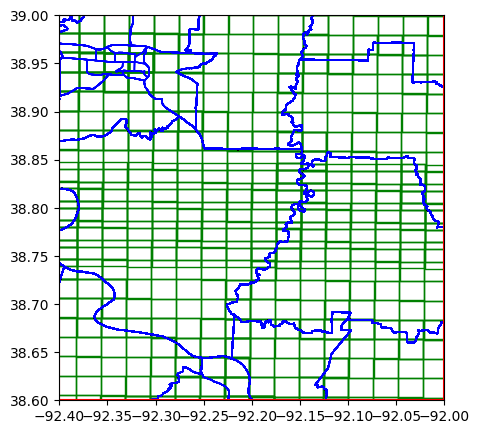

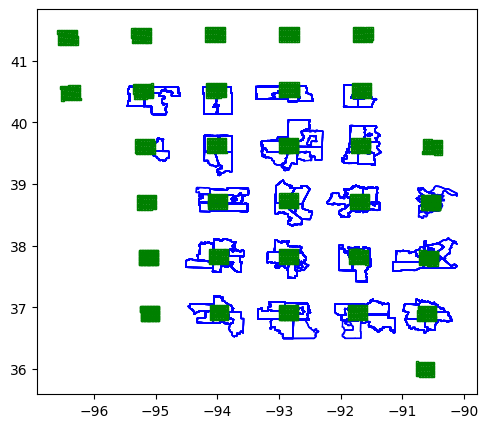

In [198]:
gdf_10 = gdf[(gdf['x'] < 2500) * (gdf['y'] < 2500)]
# gdf_10.plot()

# for tile in :
joined_gdf_1 = joined_gdf[joined_gdf['file'].isin(gdf_10['file'].values)]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_aspect('equal', adjustable='box')

obesity_gdf.loc[joined_gdf_1['index_right'].dropna().values].plot(
    ax=ax, legend=True, facecolor='none', edgecolor='b')
joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='g')


In [149]:
joined_gdf_1['index_right'].dropna().

1202     631.0
1203     631.0
1204     631.0
1205     631.0
1206     631.0
         ...  
82496    548.0
82497    549.0
82497    548.0
82498    549.0
82499    549.0
Name: index_right, Length: 63592, dtype: float64

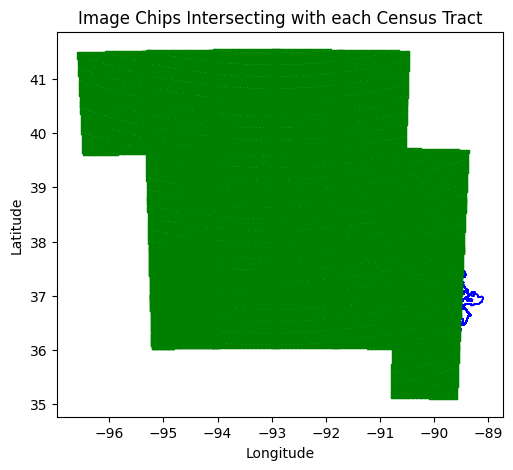

In [209]:
gdf_10 = gdf#[(gdf['x'] < 2500) * (gdf['y'] < 2500)]
# gdf_10.plot()

# for tile in :
joined_gdf_1 = joined_gdf[joined_gdf['file'].isin(gdf_10['file'].values)]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_aspect('equal', adjustable='box')

obesity_gdf.loc[joined_gdf_1['index_right'].dropna().values].plot(
    ax=ax, legend=True, facecolor='none', edgecolor='b')
joined_gdf_1.plot(ax=ax, facecolor='none', edgecolor='g')


ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude')

ax.set_title('Image Chips Intersecting with each Census Tract')
plt.show()

# Most updated data

In [4]:
joined_gdf.dropna().to_csv('Data.csv', index=False)

NameError: name 'joined_gdf' is not defined

# Machine Learning Analysis

## Linear Regression for all Features 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file
file_path = 'all_joined_gdf.csv'  # Replace it with our file path
data = pd.read_csv(file_path).dropna()

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
# selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)


#print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Mean Squared Error: 8.225877959112106
R-squared: 0.18309252352695826
Adjusted R-squared: 0.026295287180492566


In [6]:
# 5-fold cross validation
data.dropna().shape

(63592, 2056)

In [7]:
X_selected

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
1202    0.000000        0.0   0.058951   0.055446   0.196550   3.538631   
1203    0.007409        0.0   0.000000   0.000000   0.000000   2.346624   
1204    0.000000        0.0   0.116667   0.018779   0.536335   2.753022   
1205    0.003601        0.0   0.022200   0.000000   0.337683   1.515011   
1206    0.000000        0.0   0.006824   0.000000   0.273446   3.491099   
...          ...        ...        ...        ...        ...        ...   
98981   0.000000        0.0   0.000000   0.007725   0.391874   0.899559   
98982   0.000000        0.0   0.000000   0.000000   0.000000   0.060605   
98983   0.000000        0.0   0.000000   0.000000   0.000000   0.060605   
98984   0.000000        0.0   0.000000   0.000000   0.131605   0.441609   
98985   0.000000        0.0   0.000000   0.000000   0.000000   0.000000   

       feature_6  feature_7  feature_8  feature_9  ...  feature_2038  \
1202    0.000000   0.071359   0.000000   0.027535  ...      0.017809   
1203    0.000000   0.000000   0.048694   0.000000  ...      0.026510   
1204    0.000000   0.026920   0.000000   0.000000  ...      0.000000   
1205    0.000000   0.000000   0.046366   0.000000  ...      0.259533   
1206    0.001096   0.000000   0.000000   0.000000  ...      0.015136   
...          ...        ...        ...        ...  ...           ...   
98981   0.000000   0.000000   0.000000   0.000000  ...      0.000000   
98982   0.000000   0.001332   0.000000   0.000000  ...      0.000000   
98983   0.000000   0.001332   0.000000   0.000000  ...      0.000000   
98984   0.000000   0.000000   0.000000   0.000000  ...      0.000000   
98985   0.000000   0.000000   0.000000   0.000000  ...      0.000000   

       feature_2039  feature_2040  feature_2041  feature_2042  feature_2043  \
1202       0.002804      0.105467      0.000000      0.198467      0.179028   
1203       0.000000      0.000000      0.012019      0.010763      0.029970   
1204       0.000000      0.000000      0.000000      0.002335      0.000000   
1205       0.029897      0.000000      0.000000      0.000000      0.000000   
1206       0.002642      0.000000      0.006018      0.009946      0.053446   
...             ...           ...           ...           ...           ...   
98981      0.000000      0.000000      0.000000      0.000000      0.059408   
98982      0.000000      0.000000      0.000000      0.000000      0.005365   
98983      0.000000      0.000000      0.000000      0.000000      0.005365   
98984      0.000000      0.000000      0.000000      0.000000      0.167057   
98985      0.000000      0.000000      0.000000      0.000000      0.191865   

       feature_2044  feature_2045  feature_2046  feature_2047  
1202       0.023743      0.566830      0.000000      0.006722  
1203       0.000000      0.051453      0.048138      0.099001  
1204       0.162367      0.054194      0.009438      0.036084  
1205       0.140832      0.061125      0.000000      0.154052  
1206       0.060289      0.000320      0.045734      0.309472  
...             ...           ...           ...           ...  
98981      0.000000      0.000000      0.000000      0.000000  
98982      0.000000      0.000000      0.000000      0.000000  
98983      0.000000      0.000000      0.000000      0.000000  
98984      0.000000      0.000000      0.000000      0.010392  
98985      0.000000      0.000000      0.000000      0.000000  

[63592 rows x 2048 columns]

### Linear Regression Scatter Plot for Testing 

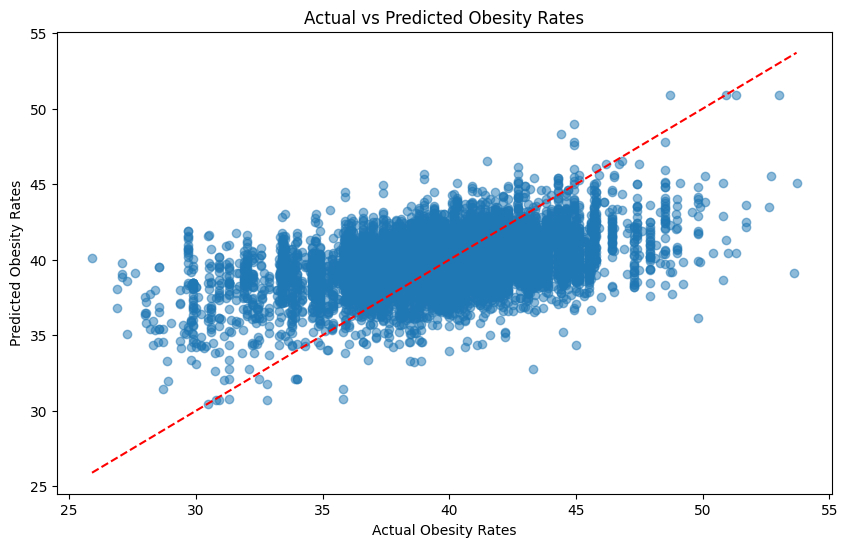

In [97]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

### Linear Regression for Scatter Plot for Training 

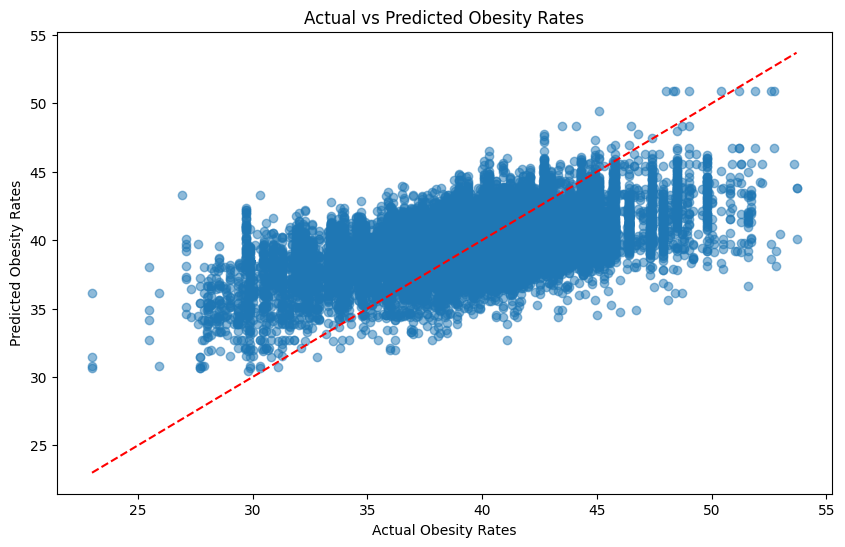

In [98]:
import matplotlib.pyplot as plt

y_pred_sel = model_sel.predict(X_train_sel)

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()


### Random Forest for All Features 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file
file_path = 'joined_gdf.csv'  # Replace it with our file path
data = pd.read_csv(file_path)

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
# selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = RandomForestRegressor(n_jobs=-1, verbose=2)
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

#print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   15.6s remaining:    2.1s


Mean Squared Error: 6.78721300849045
R-squared: 0.37608375374054603
Adjusted R-squared: 1.3101338066201964


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [11]:
# Extracting feature importances from the model
feature_importances = model_sel.feature_importances_

# Creating a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
features_df.head(10) 

Feature  Importance
1112  feature_1112    0.150118
95      feature_95    0.032387
1314  feature_1314    0.024750
767    feature_767    0.020735
239    feature_239    0.020549
1253  feature_1253    0.010475
895    feature_895    0.010437
1126  feature_1126    0.008784
338    feature_338    0.008465
668    feature_668    0.007578

<Axes: >

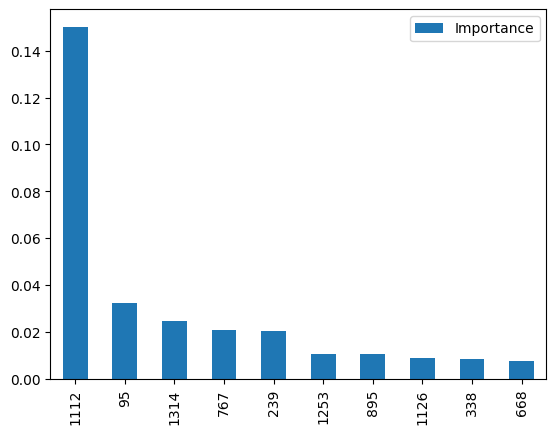

In [23]:
features_df[:10].plot.bar(y='Importance') 

In [20]:
# Extracting feature importances from the model
feature_importances = model_sel.feature_importances_

# Creating a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
features_df.tail(10) 

Feature    Importance
487    feature_487  6.002873e-08
875    feature_875  4.594441e-08
335    feature_335  3.309847e-08
1994  feature_1994  2.553493e-09
1084  feature_1084  1.871224e-09
1521  feature_1521  7.435773e-19
1443  feature_1443  0.000000e+00
1038  feature_1038  0.000000e+00
742    feature_742  0.000000e+00
663    feature_663  0.000000e+00

<Axes: xlabel='Feature'>

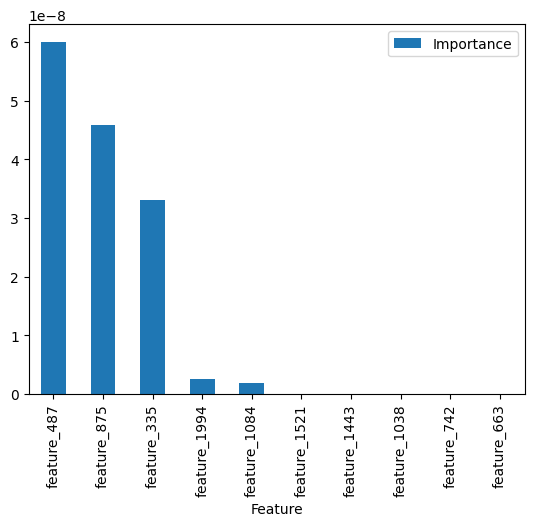

In [19]:
features_df[-10:].plot.bar(x='Feature', y='Importance')

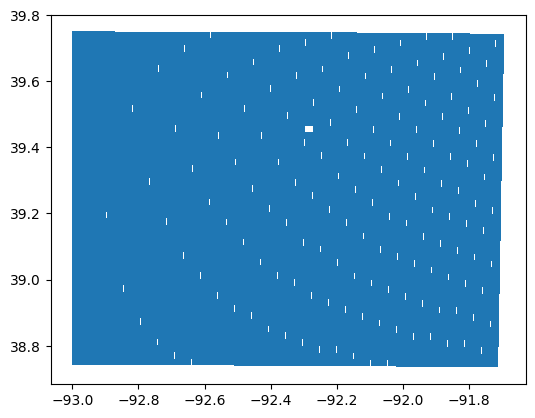

In [31]:
import geopandas as gpd
from shapely.wkt import loads

gdf = gpd.GeoDataFrame(data, geometry=data['geometry'].apply(loads)) 
# gdf.plot(column="feature_1112");
gdf.plot();


### Random Forest Scatter Plot 

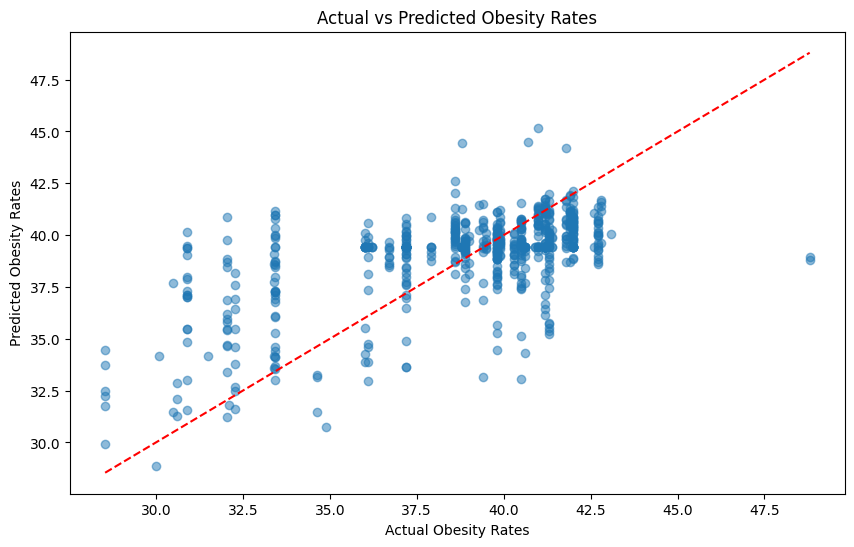

In [217]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

## Rename and save the df to df_final 

In [218]:
import pandas as pd

# Read the CSV file
file_path = 'all_joined_gdf.csv'  # Replace it with the path to our CSV file
df = pd.read_csv(file_path)

df.to_csv('df_final.csv')


## Number of Image Chips that Intersect with Each Census Tract

In [219]:
df_counts['file']

GEOID
2.900195e+10    155
2.900195e+10    175
2.900195e+10     11
2.900195e+10     12
2.900195e+10     25
               ... 
2.951013e+10      1
2.951013e+10      4
2.951013e+10      5
2.951013e+10      4
2.951013e+10      4
Name: file, Length: 1052, dtype: int64

Text(0, 0.5, 'Frequency')

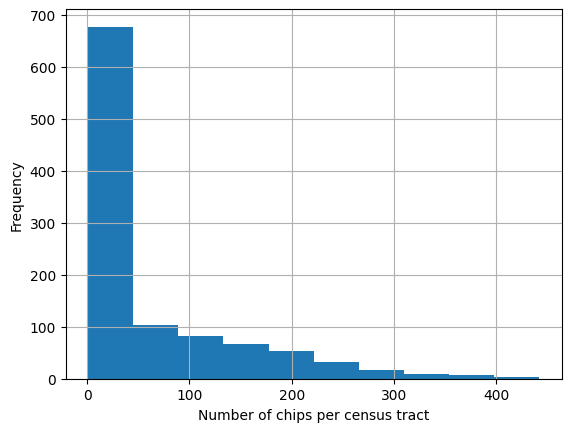

In [220]:
import matplotlib.pyplot as plt

df_counts = df.drop(['geometry', 'Unnamed: 0'], axis=1).groupby('GEOID').count()
df_counts['file'].hist()
plt.xlabel('Number of chips per census tract')
plt.ylabel('Frequency')

## The Average Features Vectors for Each Census Tract

In [80]:
ct_stats = pd.read_csv('/data/JAMIA/JAMIA_Obs_CT_final.csv', encoding='utf-8')
ct_stats[['polygon_nr','CountyName','TotalPopulation','OBESITY_CrudePrev','TractFIPS','GEOID','geometry']]

/tmp/ipykernel_29/1260513628.py:1: DtypeWarning: Columns (484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,71

polygon_nr      CountyName TotalPopulation OBESITY_CrudePrev  \
0             0           Adair            3802              35.9   
1        .5653"             NaN             NaN               NaN   
2             1           Adair            3019                37   
3        .1937"             NaN             NaN               NaN   
4             2           Adair            2951              36.7   
...         ...             ...             ...               ...   
1312       1050  St. Louis City            4075              31.8   
1313       1051  St. Louis City            3769              36.2   
1314       1052  St. Louis City            4795              41.4   
1315       1053  St. Louis City            2237              40.6   
1316       1054  St. Louis City            3239              30.1   

        TractFIPS        GEOID  \
0     29001950100  29001950100   
1             NaN          NaN   
2     29001950200  29001950200   
3             NaN          NaN   
4     29001950300  29001950300   
...           ...          ...   
1312  29510127200  29510127200   
1313  29510127300  29510127300   
1314  29510127400  29510127400   
1315  29510127500  29510127500   
1316  29510127600  29510127600   

                                               geometry  
0     POLYGON ((-92.661965 40.306474, -92.661945 40....  
1                                                   NaN  
2     POLYGON ((-92.856372 40.060868, -92.856372 40....  
3                                                   NaN  
4     POLYGON ((-92.681905 40.236066, -92.681901 40....  
...                                                 ...  
1312  POLYGON ((-90.29184099999999 38.602368, -90.29...  
1313  POLYGON ((-90.245389 38.614771999999995, -90.2...  
1314  POLYGON ((-90.226293 38.619366, -90.2262449999...  
1315  POLYGON ((-90.21853399999999 38.633285, -90.21...  
1316  POLYGON ((-90.213456 38.600308, -90.2133619999...  

[1317 rows x 7 columns]

In [81]:
from shapely.wkt import loads

# ct_stats = pd.read_csv('/data/JAMIA/obs_area_pop_final.csv')
# ct_stats = pd.read_csv('/data/JAMIA/JAMIA_Obs_CT_final.csv')
# ct_stats.index = ct_stats['GEOID']

ct_stats = obesity_gdf

ct_stats = ct_stats.to_crs(epsg='26915').reset_index()
ct_stats["area"] = ct_stats["geometry"].area/1000000
ct_stats.head()

# Convert the 'geometry' column from WKT format to Shapely geometries
# ct_stats = gpd.GeoDataFrame(ct_stats, geometry=df['geometry'].apply(loads))
# Calculate the area for each row
# ct_stats['area'] = ct_stats['geometry'].area


fig, axs = plt.subplots(1, 3, figsize=(9, 3))

ct_stats['TotalPopulation'].hist(ax=axs[0])
ct_stats['area'].hist(ax=axs[1])
ct_stats['OBESITY_CrudePrev'].hist(ax=axs[2])

# titles
axs[0].set_title('Total population')
axs[1].set_title('Area')
axs[2].set_title('Obesity Rate [%]')

axs[0].set_ylabel('Count')

NameError: name 'obesity_gdf' is not defined

In [ ]:
ct_stats

In [82]:
ct_stats.index = ct_stats['GEOID']
ct_stats = ct_stats.drop('Unnamed: 0', axis=1)
ct_stats

KeyError: "['Unnamed: 0'] not found in axis"

In [259]:
ct_stats['#chips'] = df.groupby('GEOID').size() 

In [261]:
ct_stats.describe().T.to_csv('cencus_tract_stats.csv') 

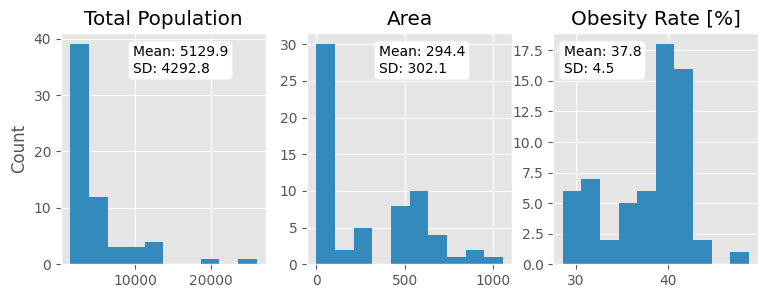

In [176]:
# Calculate mean and standard deviation for each column of interest
plt.style.use('ggplot')

mean_total_population = ct_stats['TotalPopulation'].mean()
std_total_population = ct_stats['TotalPopulation'].std()

mean_area = ct_stats['area'].mean()
std_area = ct_stats['area'].std()

mean_obesity_rate = ct_stats['OBESITY_CrudePrev'].mean()
std_obesity_rate = ct_stats['OBESITY_CrudePrev'].std()

# Plotting the histograms and annotating them with mean and standard deviation
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Histogram for Total Population
ct_stats['TotalPopulation'].hist(ax=axs[0], color='C1')
axs[0].set_title('Total Population')
axs[0].set_ylabel('Count')
axs[0].annotate(f'Mean: {mean_total_population:.1f}\nSD: {std_total_population:.1f}', 
                xy=(0.35, 0.83), xycoords='axes fraction', 
                bbox=dict(boxstyle="round", fc="white"))

# Histogram for Area
ct_stats['area'].hist(ax=axs[1], color='C1')
axs[1].set_title('Area')
axs[1].annotate(f'Mean: {mean_area:.1f}\nSD: {std_area:.1f}', 
                xy=(0.35, 0.83), xycoords='axes fraction', 
                bbox=dict(boxstyle="round", fc="white"))

ct_stats['OBESITY_CrudePrev'].hist(ax=axs[2], color='C1')
axs[2].set_title('Obesity Rate [%]')
axs[2].annotate(f'Mean: {mean_obesity_rate:.1f}\nSD: {std_obesity_rate:.1f}', 
                xy=(0.05, 0.83), xycoords='axes fraction', 
                bbox=dict(boxstyle="round", fc="white"))

fig.savefig('ct_stats.pdf')

In [267]:
df.head()

Unnamed: 0                                               file  feature_0  \
0           0  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
1           1  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
2           2  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
3           3  /home/jovyan/output_images_all/T15SUA_20220705...   0.000000   
4           4  /home/jovyan/output_images_all/T15SUA_20220705...   0.149993   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.012550   0.212394   0.020993   1.633729   1.668851   0.000000   
1   0.000000   0.000089   0.000000   0.388305   2.292640   0.000000   
2   0.000000   0.013211   0.051255   0.391074   3.104864   0.000000   
3   0.000000   0.093211   0.030976   0.787083   0.817872   0.000000   
4   0.018282   0.067738   0.012542   0.000000   1.272607   0.076134   

   feature_7  ...  feature_2044  feature_2045  feature_2046  feature_2047  \
0   0.058694  ...      0.608456      0.020677      0.589295      0.977165   
1   0.000000  ...      0.215358      0.078137      0.096382      0.440018   
2   0.069150  ...      0.000000      0.000000      0.000000      0.024606   
3   0.021972  ...      0.127253      0.000000      0.027488      0.405896   
4   0.014525  ...      0.957013      0.000000      0.000109      0.261006   

                                                 jp2  \
0  /data/obesity-images/all/T15SUA_20220705T16584...   
1  /data/obesity-images/all/T15SUA_20220705T16584...   
2  /data/obesity-images/all/T15SUA_20220705T16584...   
3  /data/obesity-images/all/T15SUA_20220705T16584...   
4  /data/obesity-images/all/T15SUA_20220705T16584...   

                                            geometry  \
0  POLYGON ((-95.24837990394671 37.02527578521076...   
1  POLYGON ((-95.24778526126155 37.00509909791619...   
2  POLYGON ((-95.24719121041963 36.98492233367489...   
3  POLYGON ((-95.24659775080694 36.96474549251076...   
4  POLYGON ((-95.24600488181039 36.9445685744476,...   

                                        image_coords  index_right  \
0  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...          NaN   
1  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...          NaN   
2  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...          NaN   
3  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...          NaN   
4  (300000.0, 4100040.0, 409800.0, 3990240.0, 109...          NaN   

   OBESITY_CrudePrev  GEOID  
0                NaN    NaN  
1                NaN    NaN  
2                NaN    NaN  
3                NaN    NaN  
4                NaN    NaN  

[5 rows x 2056 columns]

In [273]:
df['image_coords']

0        (300000.0, 4100040.0, 409800.0, 3990240.0, 109...
1        (300000.0, 4100040.0, 409800.0, 3990240.0, 109...
2        (300000.0, 4100040.0, 409800.0, 3990240.0, 109...
3        (300000.0, 4100040.0, 409800.0, 3990240.0, 109...
4        (300000.0, 4100040.0, 409800.0, 3990240.0, 109...
                               ...                        
98981    (300000.0, 4200000.0, 409800.0, 4090200.0, 109...
98982    (300000.0, 4200000.0, 409800.0, 4090200.0, 109...
98983    (300000.0, 4200000.0, 409800.0, 4090200.0, 109...
98984    (300000.0, 4200000.0, 409800.0, 4090200.0, 109...
98985    (300000.0, 4200000.0, 409800.0, 4090200.0, 109...
Name: image_coords, Length: 98986, dtype: object

In [274]:
df_average = df.dropna().drop(['Unnamed: 0', 'geometry', 'file', 'jp2', 'image_coords'], axis=1).groupby('index_right').mean()
df_average = df_average.reset_index()
df_obs_2 = df_average[["GEOID"]]
df_obs_2["GEOID"] = df_obs_2["GEOID"].astype('int64')
df_obs_2.head() 

/tmp/ipykernel_747/2509563169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obs_2["GEOID"] = df_obs_2["GEOID"].astype('int64')


GEOID
0  29001950100
1  29001950200
2  29001950300
3  29001950400
4  29001950500

In [275]:
# df_obs_2.shape

In [276]:
obs_ar_pop = pd.merge(df_obs_2, obs_area, on='GEOID', how='left')
obs_ar_pop.head()

GEOID  TotalPopulation        area  OBESITY_CrudePrev
0  29001950100             3802  657.967390               35.9
1  29001950200             3019  701.742156               37.0
2  29001950300             2951   21.057493               36.7
3  29001950400             3892   19.687365               34.5
4  29001950500             7079   71.325535               33.5

In [277]:
obs_ar_pop.shape

(1052, 4)

In [278]:
obs_ar_pop.to_csv("obs_area_pop_final.csv", index=False)

In [279]:
df_average.shape

(1052, 2051)

In [280]:
df_average.to_csv('df_average.csv')

In [281]:
# Generate the list of column names to drop
columns_to_drop = [f'feature_{i}' for i in range(0, 2048)]

# Drop the columns from the DataFrame
df_average.drop(columns=columns_to_drop)

index_right  OBESITY_CrudePrev         GEOID
0             0.0               35.9  2.900195e+10
1             1.0               37.0  2.900195e+10
2             2.0               36.7  2.900195e+10
3             3.0               34.5  2.900195e+10
4             4.0               33.5  2.900195e+10
...           ...                ...           ...
1047       1050.0               31.8  2.951013e+10
1048       1051.0               36.2  2.951013e+10
1049       1052.0               41.4  2.951013e+10
1050       1053.0               40.6  2.951013e+10
1051       1054.0               30.1  2.951013e+10

[1052 rows x 3 columns]

### Linear Regression for the Average Features Vectors for Each Census Tract (All Features)

In [282]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

#print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Mean Squared Error: 1.1801754572359457e+21
R-squared: -3.5426864866162094e+19
Adjusted R-squared: 4.047683145753014e+18


In [283]:
data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = Ridge()
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

#print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Mean Squared Error: 17.18654739688145
R-squared: 0.48408900692511003
Adjusted R-squared: 1.0589452168366305


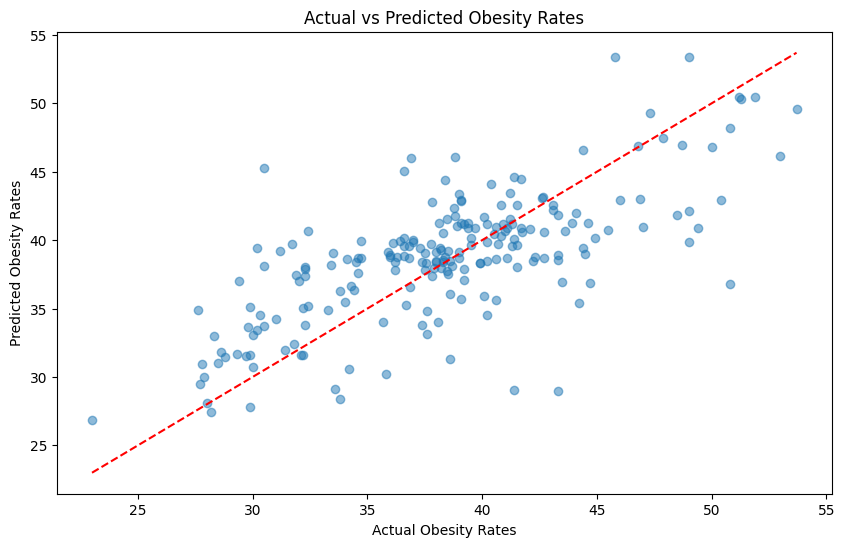

In [284]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

# 10-Fold Cross Validation

In [285]:
plt.style.use('default')

18.547673302866006


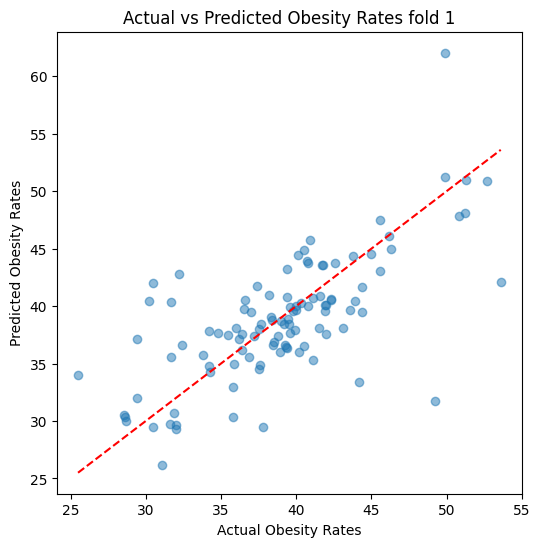

22.061575767563514


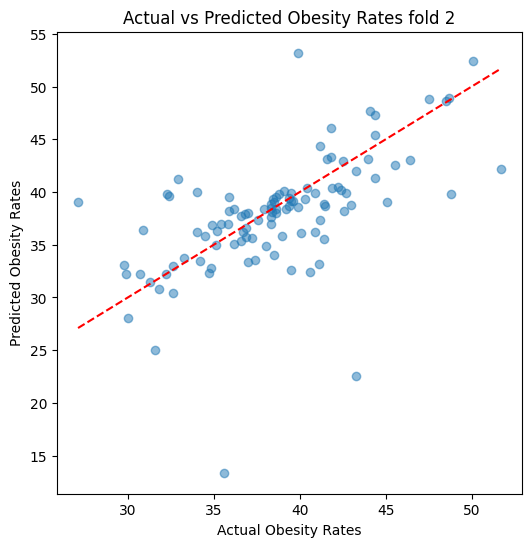

12.558400773545523


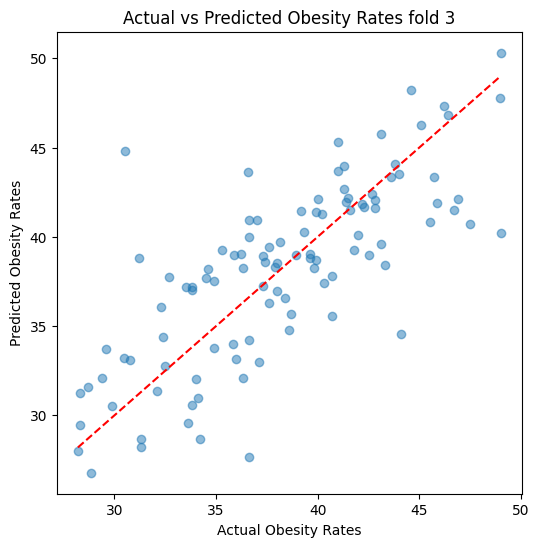

13.075060641049431


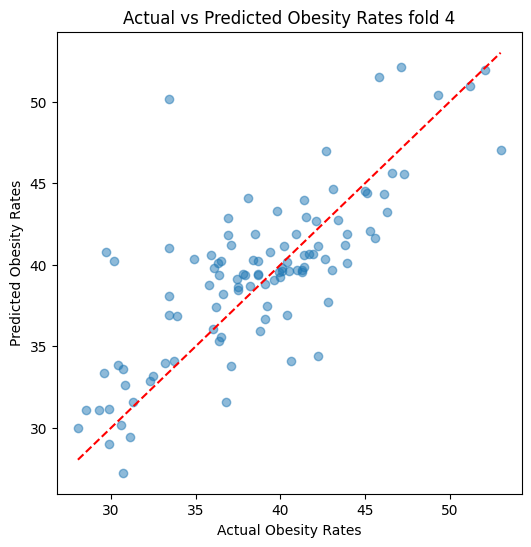

13.584754718936054


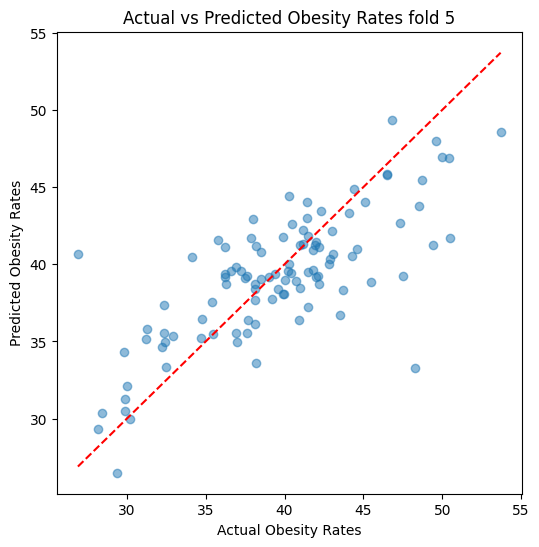

10.229308234301275


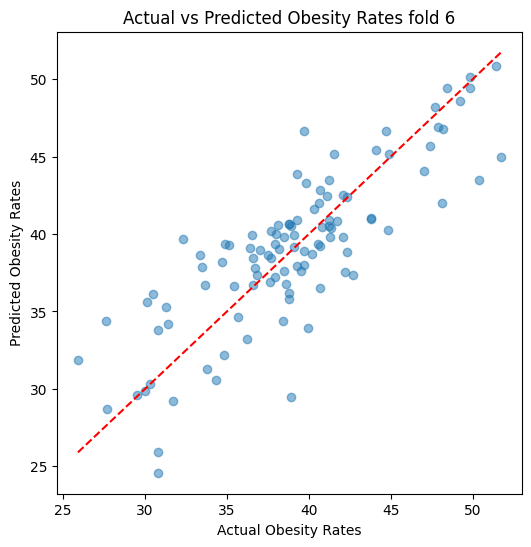

12.816389419881498


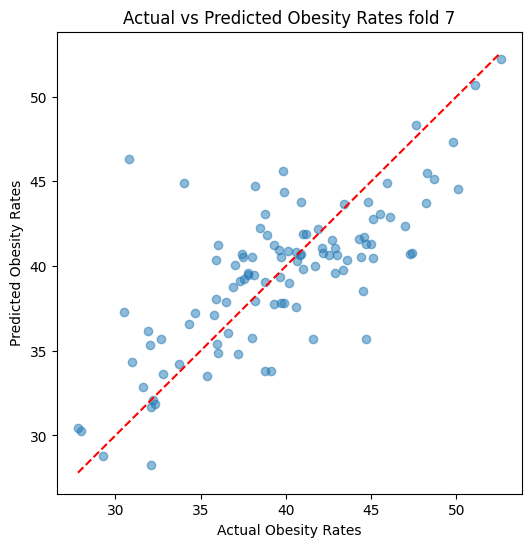

16.689431192883717


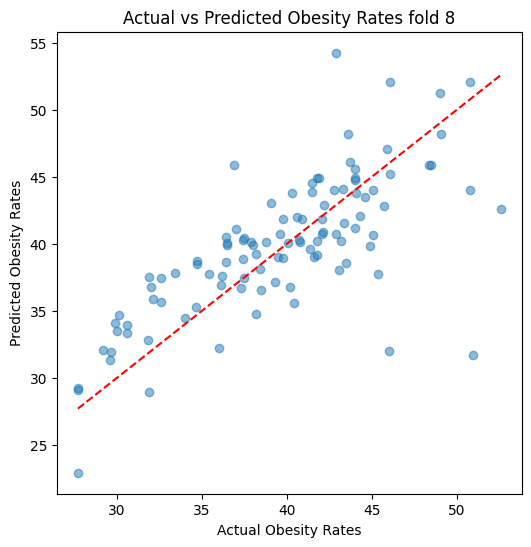

11.069228161890809


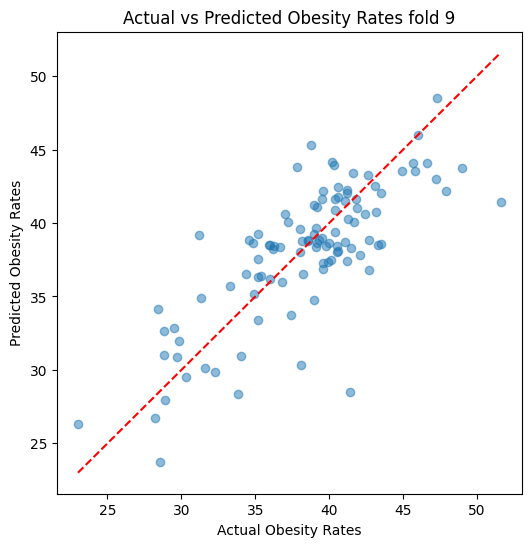

16.361569854674944


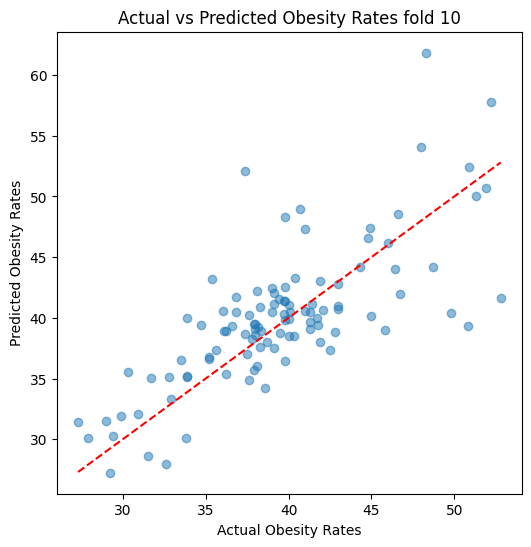

Fold        MSE        R2 Adjusted R2
0     1  18.547673  0.406327    0.400619
0     2  22.061576  0.011246    0.001739
0     3  12.558401  0.538742    0.534264
0     4  13.075061  0.546028     0.54162
0     5  13.584755  0.559884    0.555611
0     6  10.229308  0.661029    0.657738
0     7  12.816389   0.53746    0.532969
0     8  16.689431  0.485217    0.480219
0     9  11.069228  0.567865    0.563669
0    10   16.36157  0.456554    0.451278
0  Mean  14.699339  0.477035    0.471973

In [286]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the CSV file
# file_path = 'joined_gdf.csv'  # Replace it with your file path
data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.6].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]


# Preparing the selected features and target variable for the model
X = X_selected
y = data['OBESITY_CrudePrev']

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Prepare a DataFrame to store the metrics for each fold
metrics_df = pd.DataFrame(columns=['Fold', 'MSE', 'R2', 'Adjusted R2'])

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the model
    # model = LinearRegression()
    # Why use ridge regression: Better for situations with multicollinearity, when preventing 
    # overfitting is important.

    model = Ridge(alpha=1.0)  # You can adjust alpha to fine-tune the regularization strength
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Adjusted R2
    n = X_test.shape[0]  # Number of observations in the test set
    p = 1 #X_test.shape[1]  # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Append to DataFrame
    print(mse)
    metrics_df = pd.concat([metrics_df, pd.DataFrame({
        'Fold': [fold], 'MSE': [mse], 'R2': [r2], 'Adjusted R2': [adj_r2]})])

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted values
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
    plt.xlabel('Actual Obesity Rates')
    plt.ylabel('Predicted Obesity Rates')
    plt.title(f'Actual vs Predicted Obesity Rates fold {fold}')
    plt.show()
mean_row = metrics_df.mean()
mean_row['Fold'] = 'Mean'
mean_row = pd.DataFrame(mean_row).T
# Display the table
pd.concat([metrics_df, mean_row])

In [287]:
pd.DataFrame(mean_row).T

0
Fold              Mean
MSE          14.699339
R2            0.477035
Adjusted R2   0.471973

## General Linear Regression for Full Data

In [79]:
data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]
y = data['OBESITY_CrudePrev']

# Creating and fitting the linear regression model on the selected features
model_sel = Ridge()
model_sel.fit(X_selected, y)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_selected)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y, y_pred_sel)
r2_sel = r2_score(y, y_pred_sel)

# Calculate the adjusted R-squared
n = X_selected.shape[0]  # Number of observations
p = 1  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

#print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)

import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y.max()], [y.min(), y.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

NameError: name 'df_average' is not defined

Mean Squared Error: 3.6228533192803187
R-squared: 0.8745852021124562
Adjusted R-squared: 0.4560368560040521


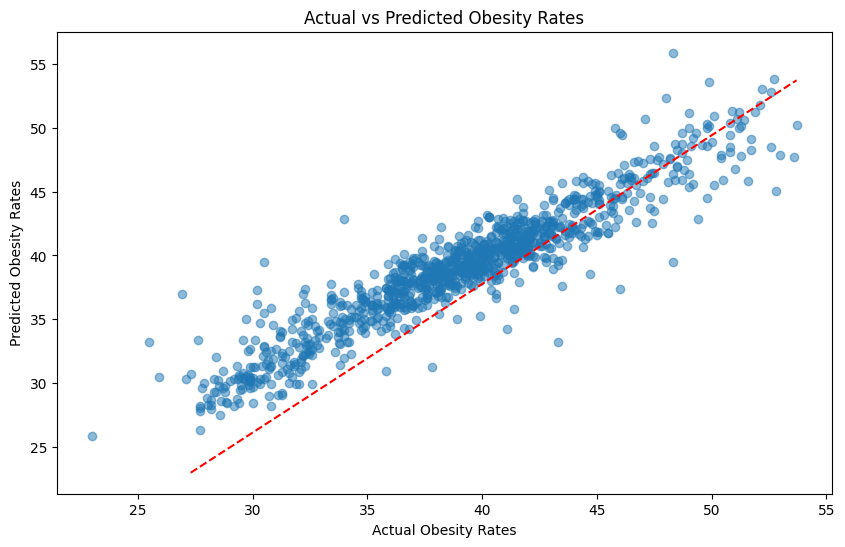

In [293]:
data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')#[selected_features]
y = data['OBESITY_CrudePrev']

# Creating and fitting the linear regression model on the selected features
model_sel = Ridge()
model_sel.fit(X_selected, y)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_selected)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y, y_pred_sel)
r2_sel = r2_score(y, y_pred_sel)

# Calculate the adjusted R-squared
# n = X_selected.shape[0]  # Number of observations
# p = X_selected.shape[1]  # Number of predictions
# adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

n = X_selected.shape[0]  # Number of observations
p = 1#X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

#print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2)

import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y.max()], [y.min(), y.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

Mean Squared Error: 12.321356243635005
R-squared: 0.5734631609918779
Adjusted R-squared: 0.8744657594478014


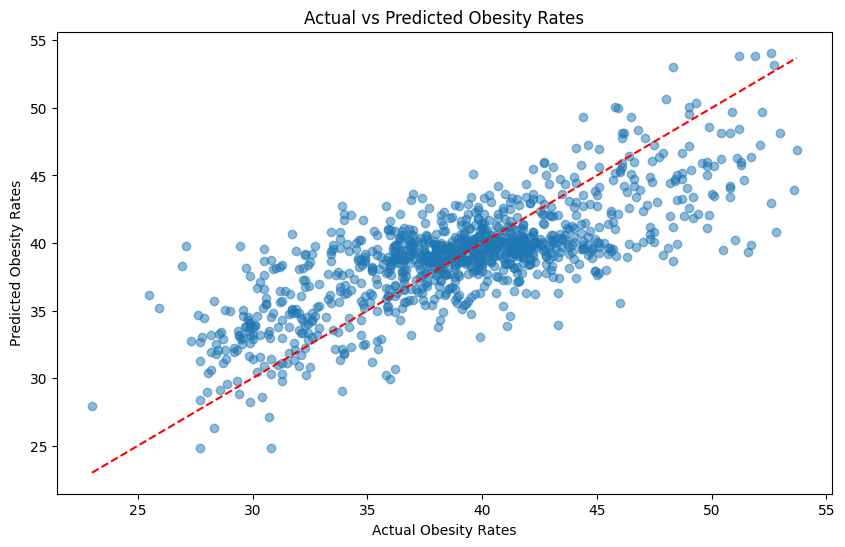

In [291]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data[selected_features]  # Use only selected features
y = data['OBESITY_CrudePrev']

# Creating and fitting the linear regression model on the selected features
model_sel = Ridge()
model_sel.fit(X_selected, y)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_selected)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y, y_pred_sel)
r2_sel = r2_score(y, y_pred_sel)

# Calculate the adjusted R-squared
n = X_selected.shape[0]  # Number of observations
# p = X_selected.shape[1]  # Number of selected features
# adj_r2_sel = 1 - (1 - r2_sel) * (n - 1) / (n - p - 1)

p = 1 #X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_sel, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()


In [292]:
from sklearn.metrics import r2_score

# Assuming y is your actual values and y_pred_sel is your predicted values from the model
r2_sel = r2_score(y, y_pred_sel)

print("R-squared:", r2_sel)


R-squared: 0.5734631609918779


### Linear Regression for the Average Features Vectors for Each Census Tract (Selected Features)

In [294]:
data = df_average

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^feature_')[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Selected Features: ['feature_2', 'feature_17', 'feature_22', 'feature_24', 'feature_60', 'feature_88', 'feature_146', 'feature_153', 'feature_160', 'feature_169', 'feature_194', 'feature_196', 'feature_215', 'feature_223', 'feature_248', 'feature_271', 'feature_285', 'feature_287', 'feature_298', 'feature_299', 'feature_323', 'feature_345', 'feature_388', 'feature_467', 'feature_486', 'feature_490', 'feature_496', 'feature_503', 'feature_514', 'feature_526', 'feature_535', 'feature_541', 'feature_565', 'feature_602', 'feature_615', 'feature_622', 'feature_627', 'feature_654', 'feature_677', 'feature_678', 'feature_683', 'feature_686', 'feature_720', 'feature_759', 'feature_788', 'feature_829', 'feature_832', 'feature_842', 'feature_843', 'feature_855', 'feature_874', 'feature_876', 'feature_893', 'feature_908', 'feature_918', 'feature_941', 'feature_1025', 'feature_1065', 'feature_1082', 'feature_1139', 'feature_1140', 'feature_1149', 'feature_1159', 'feature_1198', 'feature_1199', 'fe

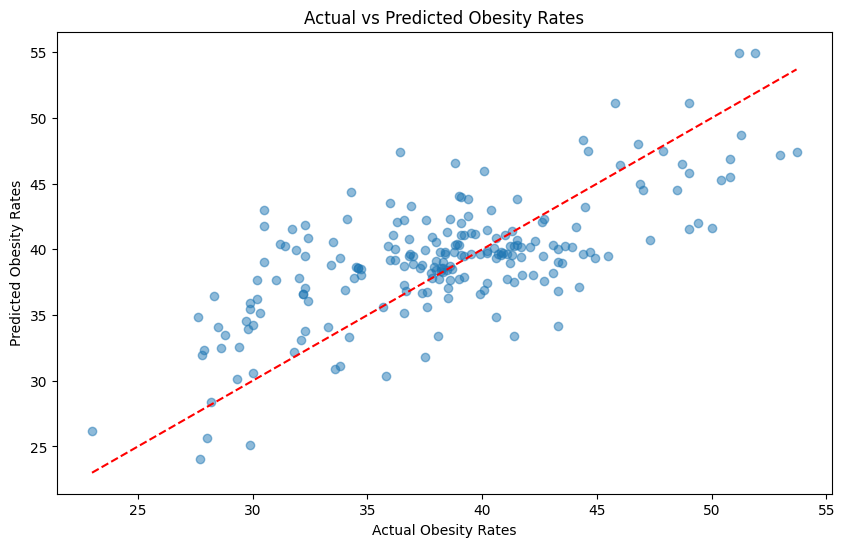

In [295]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

<h1 style="color: red">The Area Weighted Average for Each Census Tract</h1>

In [78]:
gdf

Unnamed: 0      CountyName  TotalPopulation  OBESITY_CrudePrev  \
0              0           Adair             3802               35.9   
1              1           Adair             3019               37.0   
2              2           Adair             2951               36.7   
3              3           Adair             3892               34.5   
4              4           Adair             7079               33.5   
...          ...             ...              ...                ...   
1050        1050  St. Louis City             4075               31.8   
1051        1051  St. Louis City             3769               36.2   
1052        1052  St. Louis City             4795               41.4   
1053        1053  St. Louis City             2237               40.6   
1054        1054  St. Louis City             3239               30.1   

        TractFIPS        GEOID  \
0     29001950100  29001950100   
1     29001950200  29001950200   
2     29001950300  29001950300   
3     29001950400  29001950400   
4     29001950500  29001950500   
...           ...          ...   
1050  29510127200  29510127200   
1051  29510127300  29510127300   
1052  29510127400  29510127400   
1053  29510127500  29510127500   
1054  29510127600  29510127600   

                                               geometry      area  
0     POLYGON ((-92.66196 40.30647, -92.66195 40.306...  0.069657  
1     POLYGON ((-92.85637 40.06087, -92.85637 40.060...  0.074252  
2     POLYGON ((-92.68191 40.23607, -92.68190 40.236...  0.002230  
3     POLYGON ((-92.58273 40.21831, -92.58273 40.218...  0.002085  
4     POLYGON ((-92.57997 40.17904, -92.57978 40.179...  0.007548  
...                                                 ...       ...  
1050  POLYGON ((-90.29184 38.60237, -90.29184 38.602...  0.000209  
1051  POLYGON ((-90.24539 38.61477, -90.24525 38.615...  0.000221  
1052  POLYGON ((-90.22629 38.61937, -90.22624 38.619...  0.000368  
1053  POLYGON ((-90.21853 38.63329, -90.21844 38.633...  0.000183  
1054  POLYGON ((-90.21346 38.60031, -90.21336 38.600...  0.000391  

[1055 rows x 8 columns]

In [78]:
from shapely.wkt import loads

# Convert the 'geometry' column from WKT format to Shapely geometries
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'].apply(loads)) 

# Calculate the area for each row
gdf['area'] = gdf['geometry'].area

# Add weighted features
gdf = pd.concat([gdf, gdf.iloc[:, 2:2+2048].multiply(gdf.area, axis=0).add_prefix('weighted_')], axis=1)

# Get the obesity rate per census tract/GEOID
obesity_rates_per_census_tract = gdf[['GEOID', 'OBESITY_CrudePrev']].groupby('GEOID').mean()

# Aggregate weighted features based on GEOID
columns = ['GEOID', 'area'] + [f'weighted_feature_{i}' for i in range(2048)]
weighted_features_per_census_tract = gdf[columns].groupby('GEOID').sum()
weighted_features_per_census_tract = weighted_features_per_census_tract.divide(
    weighted_features_per_census_tract.area, axis=0)
weighted_features_per_census_tract = weighted_features_per_census_tract.drop('area', axis=1)

# Add obesity_rate
weighted_features_per_census_tract = pd.concat([
    obesity_rates_per_census_tract, weighted_features_per_census_tract], axis=1)
weighted_features_per_census_tract

TypeError: unsupported operand type(s) for *: 'Polygon' and 'float'

In [297]:
import pandas as pd

weighted_features_per_census_tract.to_csv('weighted_features_per_census_tract.csv')


In [60]:
weighted_features_per_census_tract = pd.read_csv('weighted_features_per_census_tract.csv')

In [61]:
data = weighted_features_per_census_tract

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^weighted_feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^weighted_feature_')[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = 1 #X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

# print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Mean Squared Error: 18.64691390428532
R-squared: 0.4402512821227016
Adjusted R-squared: 0.4375730585921882


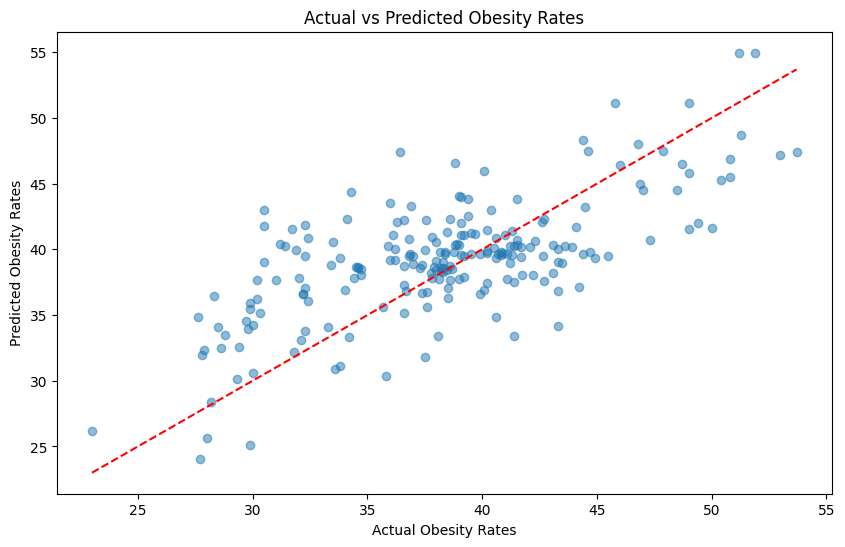

In [62]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

In [63]:
data = weighted_features_per_census_tract

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^weighted_feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.2].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^weighted_feature_')[selected_features]
y = data['OBESITY_CrudePrev']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the selected features
model_sel = RandomForestRegressor()
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = 1 #X_test_sel.shape[1]  # Number of predictions
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

# print("Selected Features:", selected_features)
print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Mean Squared Error: 17.475274773712645
R-squared: 0.475421900945702
Adjusted R-squared: 0.472911957888026


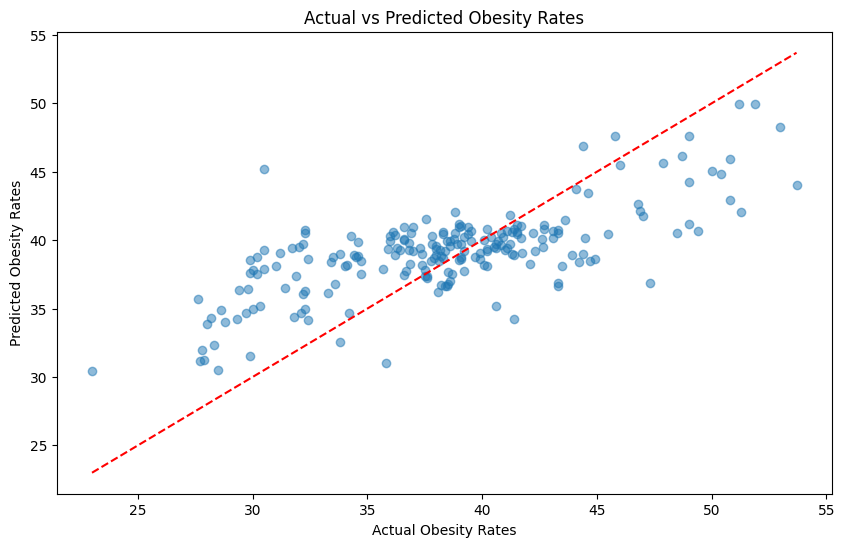

In [64]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show() 

### XGBoost for the Area Weighted Average for Each Census Tract

In [65]:
pip install xgboost

     |█████████████████████████████▍  | 272.4 MB 130.4 MB/s eta 0:00:01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Note: you may need to restart the kernel to use updated packages.


In [66]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and is already defined
# ...

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Creating and fitting the XGBoost model on the selected features
model_sel = xgb.XGBRegressor(objective='reg:squarederror')
model_sel.fit(X_train_sel, y_train)

# Making predictions on the test set
y_pred_sel = model_sel.predict(X_test_sel)

# Evaluating the model on selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

# Calculate the adjusted R-squared
n = X_test_sel.shape[0]  # Number of observations
p = 1 #X_test_sel.shape[1]  # Number of predictors
adj_r2_sel = 1 - (1-r2_sel) * (n-1) / (n-p-1)

print("Mean Squared Error:", mse_sel)
print("R-squared:", r2_sel)
print("Adjusted R-squared:", adj_r2_sel)


Mean Squared Error: 19.78076100619943
R-squared: 0.4062151158796935
Adjusted R-squared: 0.4033740398791179


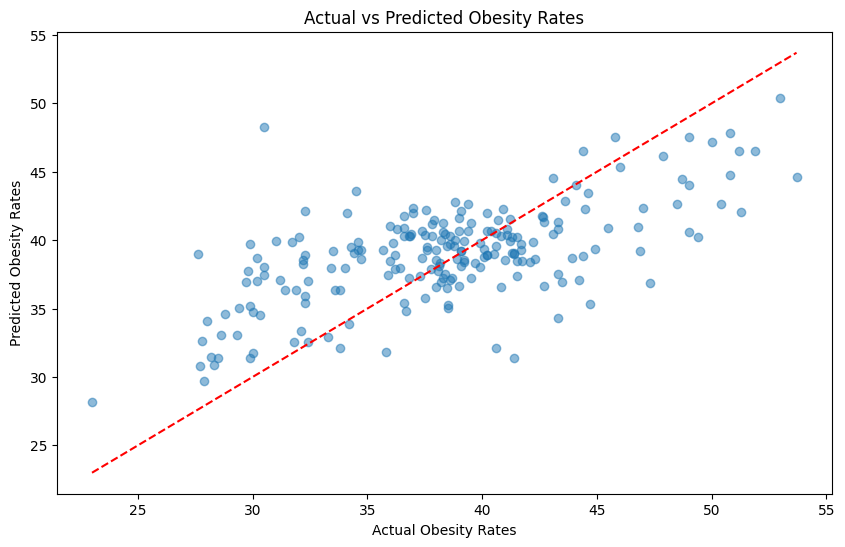

In [67]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_sel are already defined as our test target values and model predictions respectively
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sel, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
plt.xlabel('Actual Obesity Rates')
plt.ylabel('Predicted Obesity Rates')
plt.title('Actual vs Predicted Obesity Rates')
plt.show()

# Weighted average 10-fold cross validation

In [68]:
data.columns

Index(['OBESITY_CrudePrev', 'weighted_feature_0', 'weighted_feature_1',
       'weighted_feature_2', 'weighted_feature_3', 'weighted_feature_4',
       'weighted_feature_5', 'weighted_feature_6', 'weighted_feature_7',
       'weighted_feature_8',
       ...
       'weighted_feature_2038', 'weighted_feature_2039',
       'weighted_feature_2040', 'weighted_feature_2041',
       'weighted_feature_2042', 'weighted_feature_2043',
       'weighted_feature_2044', 'weighted_feature_2045',
       'weighted_feature_2046', 'weighted_feature_2047'],
      dtype='object', length=2049)

In [77]:
# Load the CSV file
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

# file_path = 'joined_gdf.csv'  # Replace it with your file path
data = weighted_features_per_census_tract

# Compute the correlation of all features with the target variable
correlation_with_target = data.filter(regex='^weighted_feature_').apply(lambda x: x.corr(data['OBESITY_CrudePrev']))

# Select features with higher correlation (both positive and negative)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.6].index.tolist()

# Preparing the selected features and target variable for the model
X_selected = data.filter(regex='^weighted_feature_')#[selected_features]


# Preparing the selected features and target variable for the model
X = X_selected
y = data['OBESITY_CrudePrev']

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Prepare a DataFrame to store the metrics for each fold
metrics_df = pd.DataFrame(columns=['Fold', 'MSE', 'R2', 'Adjusted R2'])

fig, axs = plt.subplots(2, 5, figsize=(12, 6), sharex=True, sharey=True)
axs = axs.flatten()

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the model
    # model = LinearRegression()
    # Why use ridge regression: Better for situations with multicollinearity, when preventing 
    # overfitting is important.

    model = Ridge(alpha=1.0)  # You can adjust alpha to fine-tune the regularization strength
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Adjusted R2
    n = X_test.shape[0]  # Number of observations in the test set
    p = 1 #X_test.shape[1]  # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Append to DataFrame
    print(mse)
    metrics_df = pd.concat([metrics_df, pd.DataFrame({
        'Fold': [fold], 'MSE': [mse], 'R2': [r2], 'Adjusted R2': [adj_r2]})])

    # plt.figure(figsize=(6, 6))
    axs[fold].scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted values
    axs[fold].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') 
    if fold in [0, 5]:
        axs[fold].set_ylabel('Predicted Obesity Rates')
    if fold > 4:
        axs[fold].set_xlabel('Actual Obesity Rates')
    axs[fold].set_title(f'Fold {fold + 1}')

plt.suptitle('Actual vs Predicted Obesity Rates (%)')
plt.tight_layout()
plt.show()
mean_row = metrics_df.mean()
mean_row['Fold'] = 'Mean'
mean_row = pd.DataFrame(mean_row).T
# Display the table
pd.concat([metrics_df, mean_row])

NameError: name 'weighted_features_per_census_tract' is not defined

In [36]:
import pandas as pd

df = pd.read_csv('/data/JAMIA/final-original.csv')

In [33]:
joined_gdf

NameError: name 'joined_gdf' is not defined

In [37]:
features_and_geometry = df.merge(data, on='GEOID').drop(['OBESITY_CrudePrev_x', 'Unnamed: 0'], axis=1)
features_and_geometry.to_csv('features_and_geometry.csv', index=False) 

KeyError: "['Unnamed: 0'] not found in axis"

In [38]:
features_and_geometry = pd.read_csv('features_and_geometry.csv')

In [39]:
features_columns = [f'weighted_feature_{i}' for i in range(2048)]
x = features_and_geometry[features_columns].to_numpy()
y_pred = model.predict(x)

NameError: name 'model' is not defined

In [40]:
features_and_geometry['pred_obesity'] = y_pred

NameError: name 'y_pred' is not defined

In [41]:
pred_obesity_gdf = gpd.GeoDataFrame(features_and_geometry, geometry=features_and_geometry['geometry'].apply(loads))

Text(0.5, 1.0, 'Missouri State')

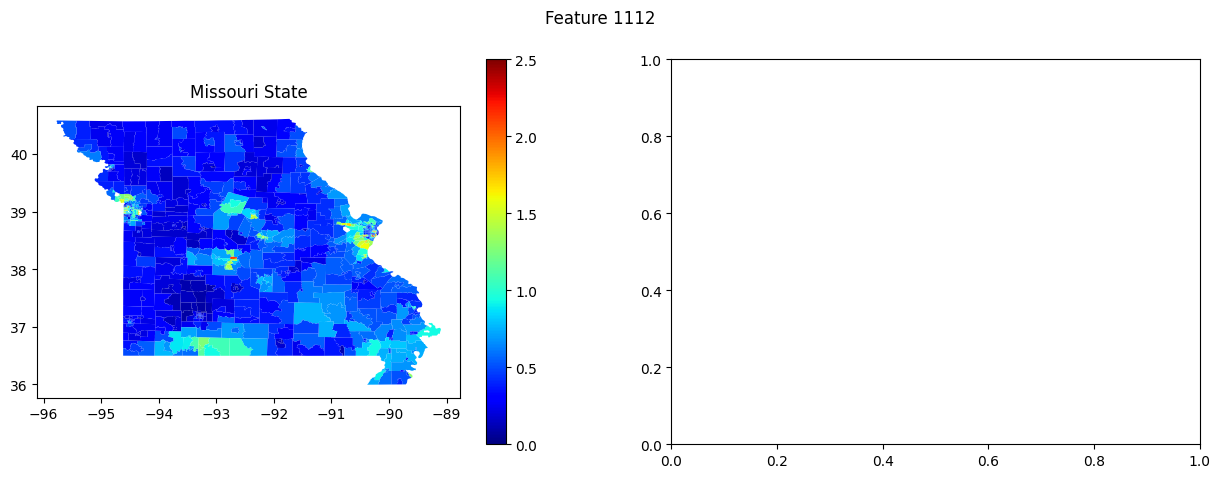

In [118]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=axs[0], legend=True, vmin=0, vmax=2.5)
#pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Stoddard'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
#pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Pemiscot'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 1112')
axs[0].set_title('Missouri State')
#axs[1].set_title('Stoddard County')
#axs[2].set_title('Pemiscot County') 

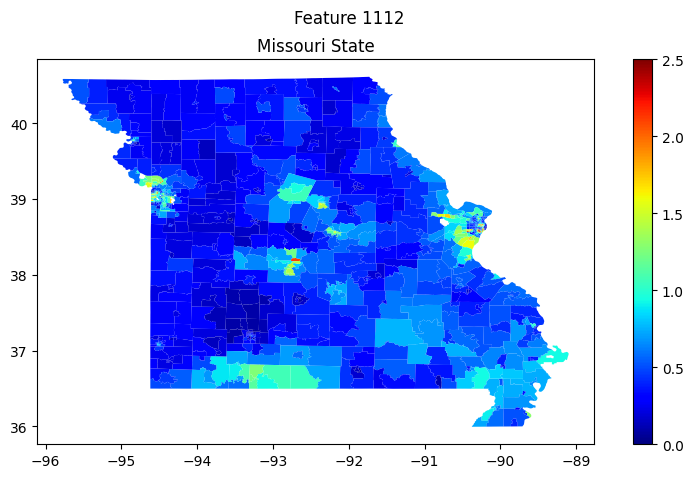

In [119]:
import matplotlib.pyplot as plt

# Assuming pred_obesity_gdf is preloaded with the necessary data
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])

fig, ax = plt.subplots(figsize=(10, 5))  # Adjusted for a single plot
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=ax, legend=True, vmin=0, vmax=2.5)
fig.suptitle('Feature 1112')
ax.set_title('Missouri State')
plt.show() 


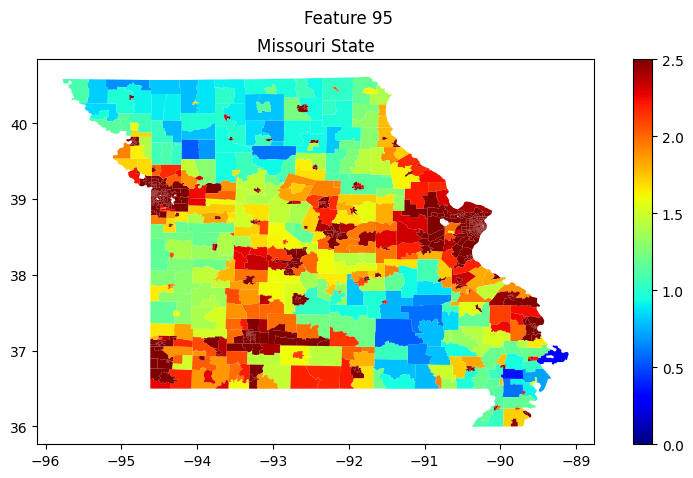

In [120]:
import matplotlib.pyplot as plt

# Assuming pred_obesity_gdf is preloaded with the necessary data
minv, maxv = min(pred_obesity_gdf['weighted_feature_95']), max(pred_obesity_gdf['weighted_feature_95'])

fig, ax = plt.subplots(figsize=(10, 5))  # Adjusted for a single plot
pred_obesity_gdf.plot(column='weighted_feature_95', cmap='jet', ax=ax, legend=True, vmin=0, vmax=2.5)
fig.suptitle('Feature 95')
ax.set_title('Missouri State')
plt.show() 


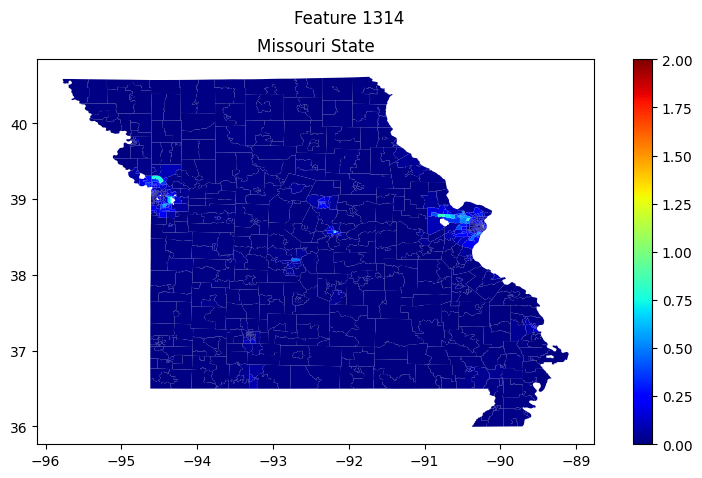

In [124]:
import matplotlib.pyplot as plt

# Assuming pred_obesity_gdf is preloaded with the necessary data
minv, maxv = min(pred_obesity_gdf['weighted_feature_1314']), max(pred_obesity_gdf['weighted_feature_1314'])

fig, ax = plt.subplots(figsize=(10, 5))  # Adjusted for a single plot
pred_obesity_gdf.plot(column='weighted_feature_1314', cmap='jet', ax=ax, legend=True, vmin=0, vmax=2)
fig.suptitle('Feature 1314')
ax.set_title('Missouri State')
plt.show() 

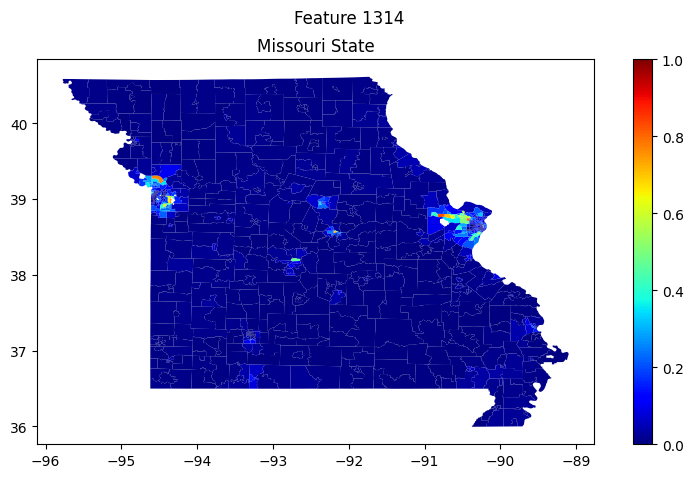

In [123]:
import matplotlib.pyplot as plt

# Assuming pred_obesity_gdf is preloaded with the necessary data
minv, maxv = min(pred_obesity_gdf['weighted_feature_1314']), max(pred_obesity_gdf['weighted_feature_1314'])

fig, ax = plt.subplots(figsize=(10, 5))  # Adjusted for a single plot
pred_obesity_gdf.plot(column='weighted_feature_1314', cmap='jet', ax=ax, legend=True, vmin=0, vmax=1)
fig.suptitle('Feature 1314')
ax.set_title('Missouri State')
plt.show() 


Text(0.5, 1.0, 'Pemiscot County')

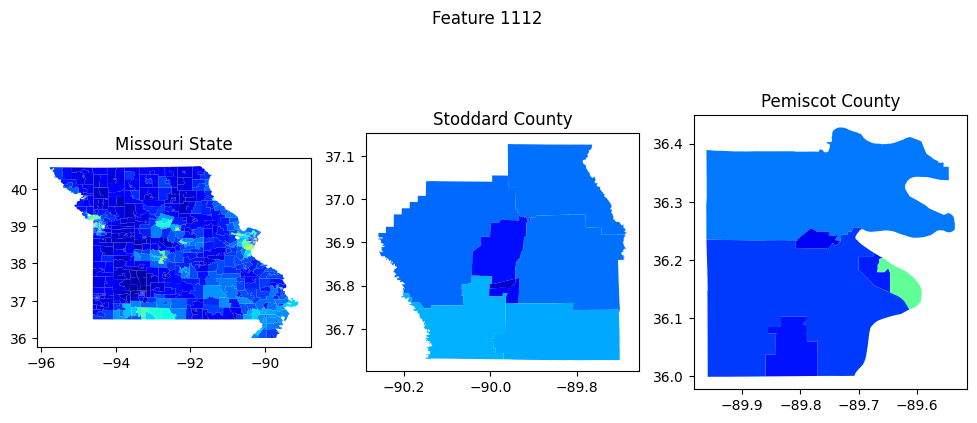

In [83]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=axs[0], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Stoddard'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Pemiscot'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 1112')
axs[0].set_title('Missouri State')
axs[1].set_title('Stoddard County')
axs[2].set_title('Pemiscot County') 


Text(0.5, 1.0, 'Pemiscot County')

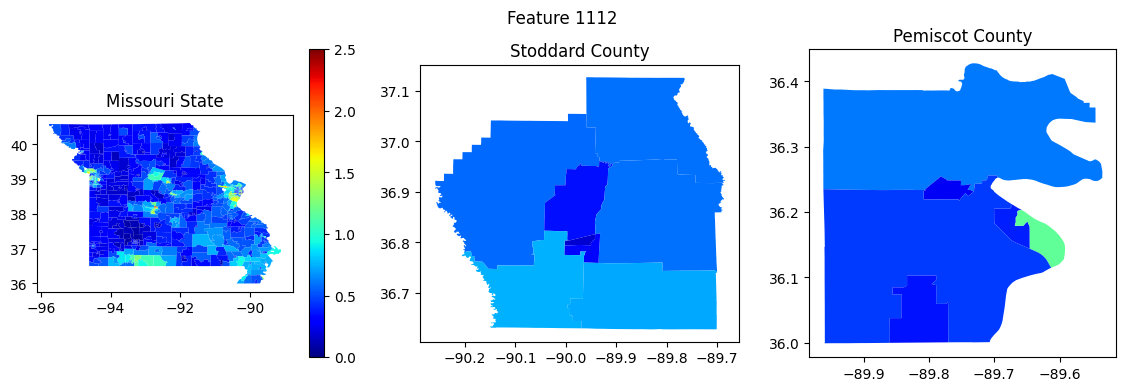

In [107]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=axs[0], legend=True, vmin=0, vmax=2.5)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Stoddard'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Pemiscot'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 1112')
axs[0].set_title('Missouri State')
axs[1].set_title('Stoddard County')
axs[2].set_title('Pemiscot County') 

Text(0.5, 1.0, 'Pemiscot County')

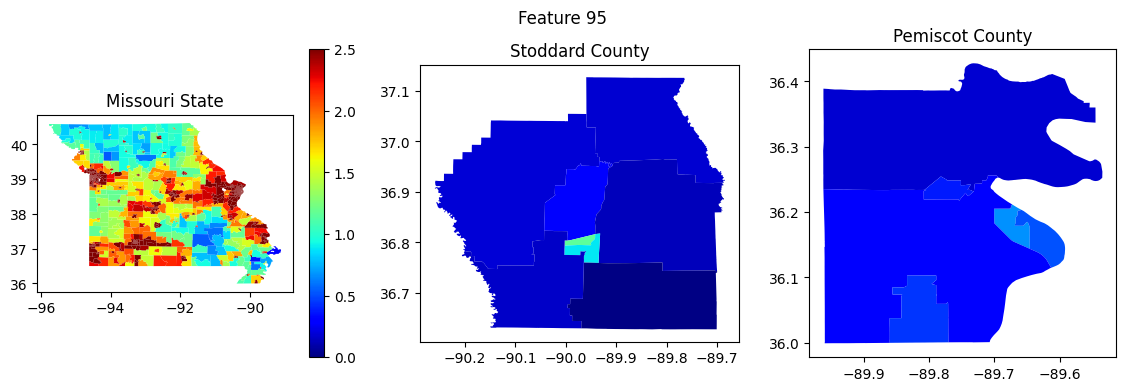

In [127]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_95']), max(pred_obesity_gdf['weighted_feature_95'])
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
pred_obesity_gdf.plot(column='weighted_feature_95', cmap='jet', ax=axs[0], legend=True, vmin=0, vmax=2.5)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Stoddard'].plot(column='weighted_feature_95', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Pemiscot'].plot(column='weighted_feature_95', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 95')
axs[0].set_title('Missouri State')
axs[1].set_title('Stoddard County')
axs[2].set_title('Pemiscot County') 

Text(0.5, 1.0, 'Audrain County')

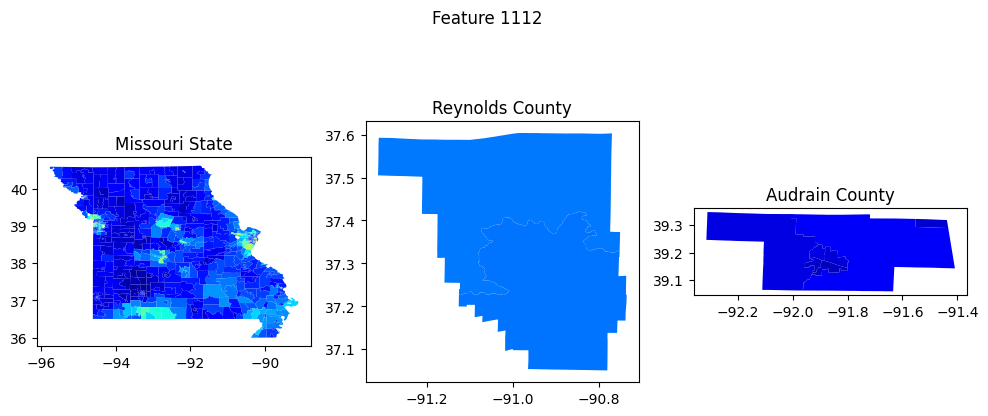

In [126]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=axs[0], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Reynolds'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Audrain'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 1112')
axs[0].set_title('Missouri State')
axs[1].set_title('Reynolds County')
axs[2].set_title('Audrain County') 


Text(0.5, 1.0, 'Audrain County')

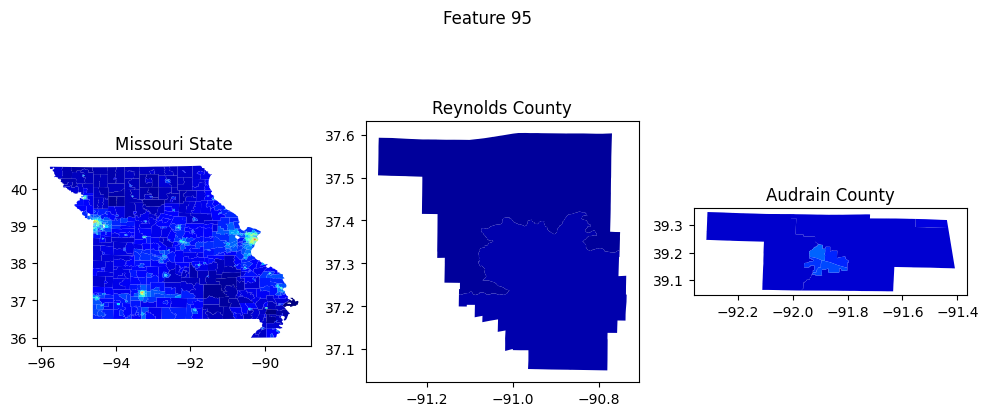

In [128]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_95']), max(pred_obesity_gdf['weighted_feature_95'])
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
pred_obesity_gdf.plot(column='weighted_feature_95', cmap='jet', ax=axs[0], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Reynolds'].plot(column='weighted_feature_95', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Audrain'].plot(column='weighted_feature_95', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 95')
axs[0].set_title('Missouri State')
axs[1].set_title('Reynolds County')
axs[2].set_title('Audrain County') 


Text(0.5, 1.0, 'Jackson County')

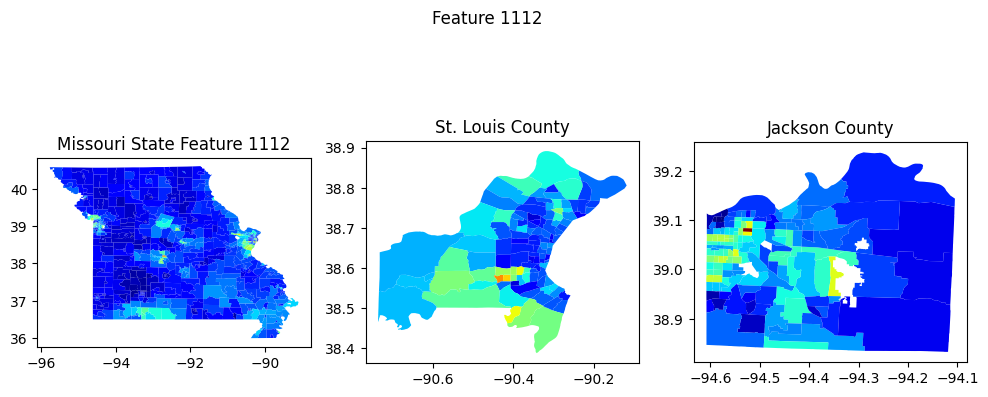

In [86]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=axs[0], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'St. Louis'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Jackson'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 1112')
axs[0].set_title('Missouri State Feature 1112')
axs[1].set_title('St. Louis County')
axs[2].set_title('Jackson County') 

Text(0.5, 1.0, 'Jackson County')

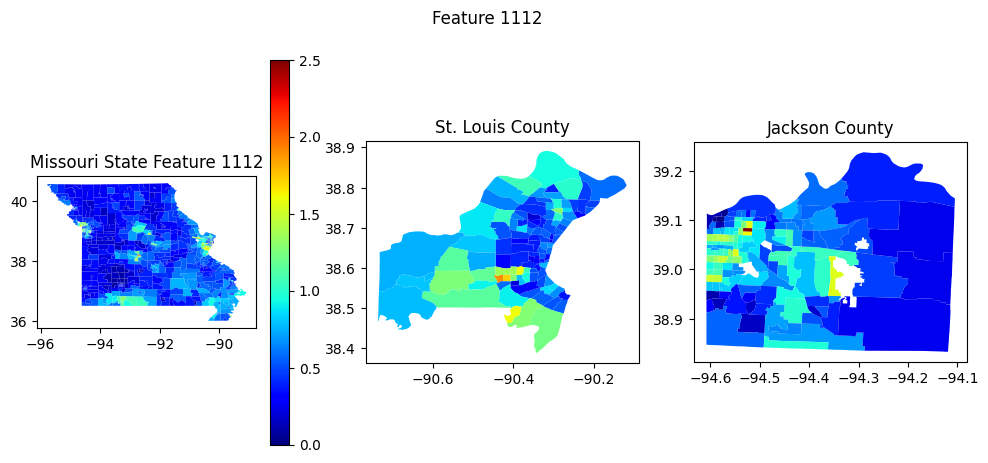

In [108]:
import matplotlib.pyplot as plt
minv, maxv = min(pred_obesity_gdf['weighted_feature_1112']), max(pred_obesity_gdf['weighted_feature_1112'])
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
pred_obesity_gdf.plot(column='weighted_feature_1112', cmap='jet', ax=axs[0], legend=True, vmin=0, vmax=2.5)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'St. Louis'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[1], vmin=minv, vmax=maxv)
pred_obesity_gdf[pred_obesity_gdf['CountyName'] == 'Jackson'].plot(column='weighted_feature_1112', cmap='jet', ax=axs[2], vmin=minv, vmax=maxv)
fig.suptitle('Feature 1112')
axs[0].set_title('Missouri State Feature 1112')
axs[1].set_title('St. Louis County')
axs[2].set_title('Jackson County') 

array([[<Axes: title={'center': 'weighted_feature_1112'}>,
        <Axes: title={'center': 'weighted_feature_95'}>],
       [<Axes: title={'center': 'weighted_feature_1314'}>,
        <Axes: title={'center': 'weighted_feature_767'}>]], dtype=object)

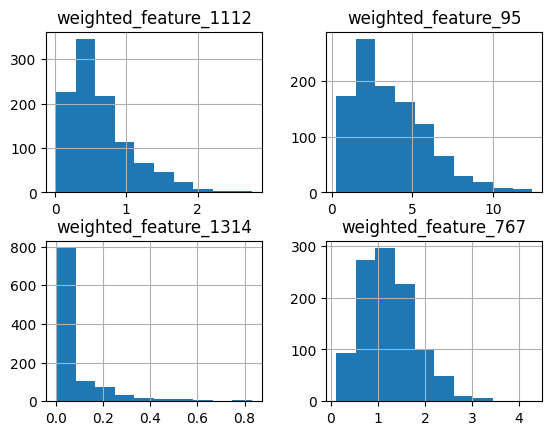

In [88]:
pred_obesity_gdf[['weighted_feature_1112', 'weighted_feature_95', 'weighted_feature_1314', 'weighted_feature_767']].hist() 

array([[<Axes: title={'center': 'weighted_feature_239'}>,
        <Axes: title={'center': 'weighted_feature_1253'}>],
       [<Axes: title={'center': 'weighted_feature_895'}>, <Axes: >]],
      dtype=object)

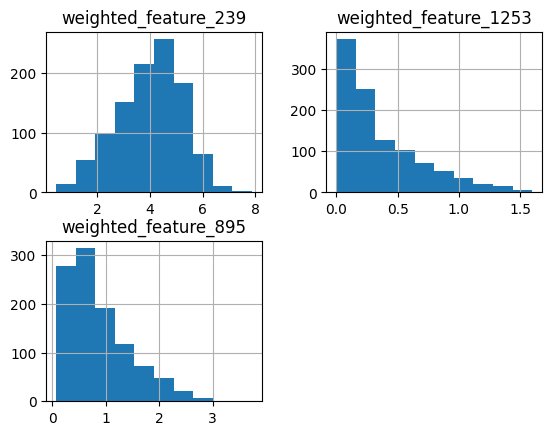

In [89]:
pred_obesity_gdf[['weighted_feature_239', 'weighted_feature_1253', 'weighted_feature_895']].hist() 

array([[<Axes: title={'center': 'weighted_feature_1126'}>,
        <Axes: title={'center': 'weighted_feature_338'}>],
       [<Axes: title={'center': 'weighted_feature_668'}>, <Axes: >]],
      dtype=object)

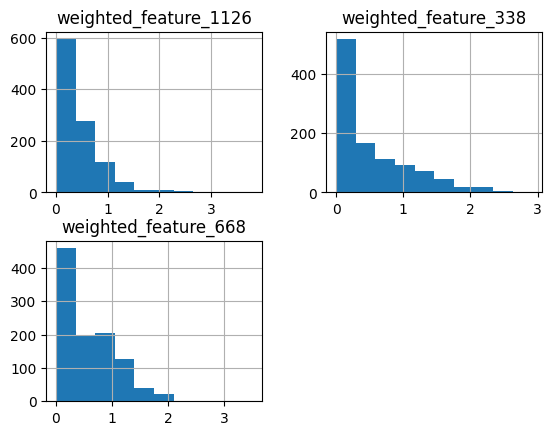

In [90]:
pred_obesity_gdf[['weighted_feature_1126', 'weighted_feature_338', 'weighted_feature_668']].hist() 

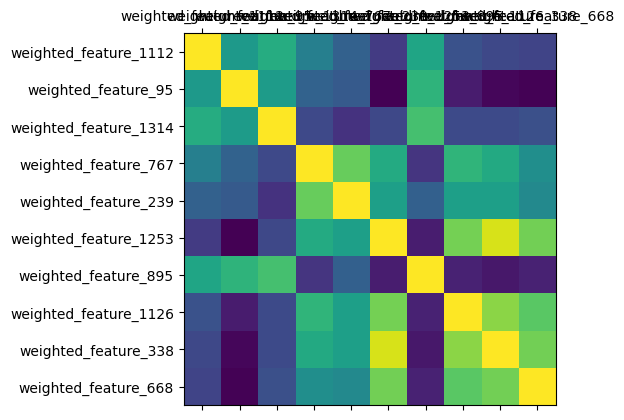

In [91]:
columns = ['weighted_feature_1112', 'weighted_feature_95', 'weighted_feature_1314', 'weighted_feature_767', 'weighted_feature_239', 'weighted_feature_1253', 'weighted_feature_895', 'weighted_feature_1126', 'weighted_feature_338', 'weighted_feature_668']
plt.matshow(pred_obesity_gdf[columns].corr())
plt.xticks(np.arange(len(columns)), columns)
plt.yticks(np.arange(len(columns)), columns)
plt.show()


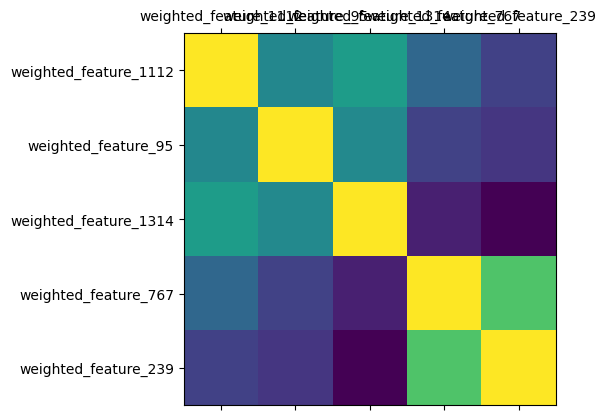

In [92]:
columns = ['weighted_feature_1112', 'weighted_feature_95', 'weighted_feature_1314', 'weighted_feature_767', 'weighted_feature_239']
plt.matshow(pred_obesity_gdf[columns].corr())
plt.xticks(np.arange(len(columns)), columns)
plt.yticks(np.arange(len(columns)), columns)
plt.show()


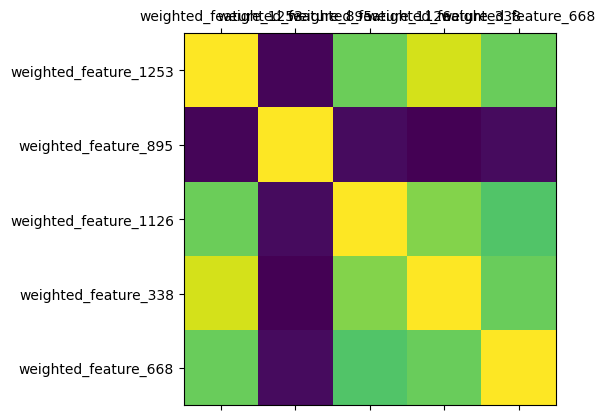

In [93]:
columns = ['weighted_feature_1253', 'weighted_feature_895', 'weighted_feature_1126', 'weighted_feature_338', 'weighted_feature_668']
plt.matshow(pred_obesity_gdf[columns].corr())
plt.xticks(np.arange(len(columns)), columns)
plt.yticks(np.arange(len(columns)), columns)
plt.show() 


In [105]:
pred_obesity_gdf['error'] = np.sqrt((pred_obesity_gdf['OBESITY_CrudePrev_y'] - pred_obesity_gdf['pred_obesity']) ** 2) 

In [139]:
pred_obesity_gdf['signed_error'] = pred_obesity_gdf['OBESITY_CrudePrev_y'] - pred_obesity_gdf['pred_obesity'] 

KeyError: 'pred_obesity'

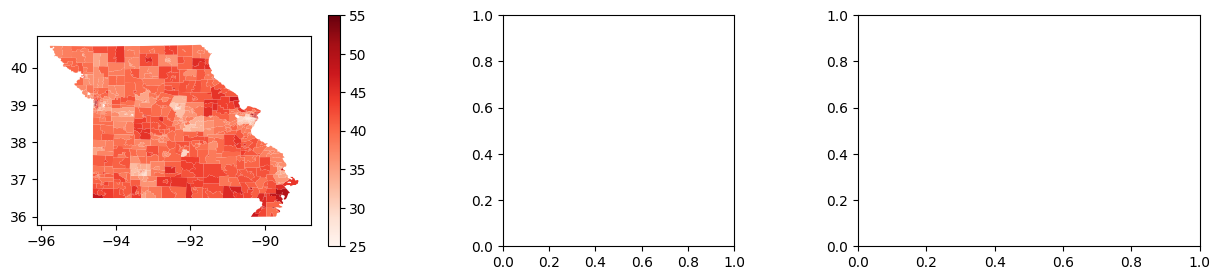

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
pred_obesity_gdf.plot(column='OBESITY_CrudePrev_y', ax=axs[0], cmap="Reds", legend=True, vmin=25, vmax=55)
pred_obesity_gdf.plot(column='pred_obesity', ax=axs[1], cmap="Reds", legend=True, vmin=25, vmax=55)
pred_obesity_gdf.plot(column='error', ax=axs[2], cmap="jet", legend=True, vmax=4)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# legend = axs[0].get_legend()
# legend.set_title('Obesity per 100k')
axs[0].set_title(label='Actual Obesity Rate (%)')
axs[1].set_title(label='Predicted Obesity Rate (%)')
axs[2].set_title(label='RMSE')

# ax.set_title('Obesity Rates per Census Tract Polygon') # Census Tract-wise Obesity Rates in Missouri 
# ax.set_title('Census Tract-wise Obesity Rates in Missouri (2022)') 
plt.show() 

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
pred_obesity_gdf.plot(column='OBESITY_CrudePrev_y', ax=axs[0], cmap="Reds", legend=True, vmin=25, vmax=55)
pred_obesity_gdf.plot(column='pred_obesity', ax=axs[1], cmap="Reds", legend=True, vmin=25, vmax=55)
pred_obesity_gdf.plot(column='error', ax=axs[2], cmap="jet", legend=True, vmax=4)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# legend = axs[0].get_legend()
# legend.set_title('Obesity per 100k')
axs[0].set_title(label='Actual Obesity Rate (%)')
axs[1].set_title(label='Predicted Obesity Rate (%)')
axs[2].set_title(label='RMSE')

# ax.set_title('Obesity Rates per Census Tract Polygon') # Census Tract-wise Obesity Rates in Missouri 
# ax.set_title('Census Tract-wise Obesity Rates in Missouri (2022)') 
plt.show()

In [118]:
lowest_error_df = pred_obesity_gdf.sort_values('error').head(10).drop(['geometry', *[f'weighted_feature_{i}' for i in range(2048)]], axis=1)
highest_error_df = pred_obesity_gdf.sort_values('error').tail(10).drop(['geometry', *[f'weighted_feature_{i}' for i in range(2048)]], axis=1)

In [119]:
lowest_error_df

CountyName  TotalPopulation    TractFIPS        GEOID  \
53       Boone            19485  29019001500  29019001500   
861  St. Louis            11842  29189220600  29189220600   
428    Jackson            11874  29095012800  29095012800   
659     Pettis             5867  29159480200  29159480200   
717   Reynolds             3058  29179380100  29179380100   
585     Marion             4339  29127960100  29127960100   
270     Greene             5029  29077001500  29077001500   
18     Audrain             2899  29007950600  29007950600   
247   Franklin             3758  29071801000  29071801000   
397    Jackson             2316  29095009300  29095009300   

     OBESITY_CrudePrev_y  pred_obesity     error  
53             34.627498     34.627215  0.000283  
861            32.390610     32.392532  0.001922  
428            38.929897     38.934143  0.004245  
659            40.100000     40.091721  0.008279  
717            39.000000     38.991681  0.008319  
585            38.800000     38.809468  0.009468  
270            32.300000     32.289660  0.010340  
18             41.000000     41.010833  0.010833  
247            40.400000     40.387976  0.012024  
397            32.200000     32.212876  0.012876

In [120]:
highest_error_df

CountyName  TotalPopulation    TractFIPS        GEOID  \
1037  St. Louis City             1845  29510124600  29510124600   
907         Stoddard             4968  29207470600  29207470600   
360          Jackson             1651  29095005100  29095005100   
461          Jackson             2046  29095016100  29095016100   
386          Jackson             2765  29095008200  29095008200   
1028  St. Louis City             5454  29510119300  29510119300   
454          Jackson             3826  29095015400  29095015400   
648         Pemiscot             3613  29155470200  29155470200   
369          Jackson             2542  29095006100  29095006100   
793        St. Louis             6669  29189213400  29189213400   

      OBESITY_CrudePrev_y  pred_obesity      error  
1037                 46.0     37.632204   8.367796  
907                  39.8     48.318528   8.518528  
360                  34.0     42.758682   8.758682  
461                  49.8     40.421808   9.378192  
386                  30.5     40.138313   9.638313  
1028                 26.9     37.824330  10.924330  
454                  52.8     41.605492  11.194508  
648                  50.8     39.312765  11.487235  
369                  48.3     61.834835  13.534835  
793                  37.4     52.072251  14.672251

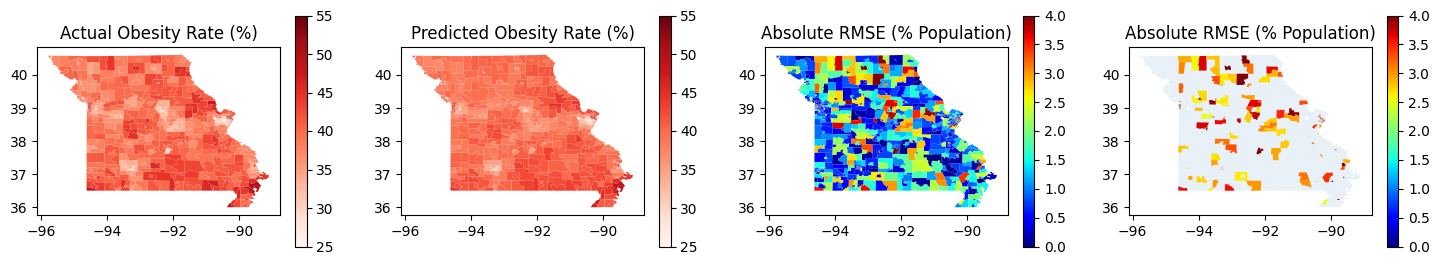

In [195]:
fig, axs = plt.subplots(1, 4, figsize=(18, 3))
pred_obesity_gdf.plot(column='OBESITY_CrudePrev_y', ax=axs[0], cmap="Reds", legend=True, vmin=25, vmax=55)
pred_obesity_gdf.plot(column='pred_obesity', ax=axs[1], cmap="Reds", legend=True, vmin=25, vmax=55)
pred_obesity_gdf.plot(column='error', ax=axs[2], cmap="jet", legend=True, vmin=0, vmax=4)
pred_obesity_gdf.plot(ax=axs[3], alpha=0.1)
pred_obesity_gdf[pred_obesity_gdf['error'] > 2.5].plot(column='error', ax=axs[3], cmap="jet", legend=True, vmin=0, vmax=4)
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')

# legend = axs[0].get_legend()
# legend.set_title('Obesity per 100k')
axs[0].set_title(label='Actual Obesity Rate (%)')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
axs[1].set_title(label='Predicted Obesity Rate (%)')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
axs[2].set_title(label='Absolute RMSE (% Population)')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
axs[3].set_title(label='Absolute RMSE (% Population)') 
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')

# ax.set_title('Obesity Rates per Census Tract Polygon') # Census Tract-wise Obesity Rates in Missouri 
# ax.set_title('Census Tract-wise Obesity Rates in Missouri (2022)') 
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
plt.show()


In [141]:
lowest_error_df = pred_obesity_gdf.sort_values('error').head(10).drop(['geometry', 'TractFIPS', *[f'weighted_feature_{i}' for i in range(2048)]], axis=1)
highest_error_df = pred_obesity_gdf.sort_values('error').tail(10).drop(['geometry', 'TractFIPS', *[f'weighted_feature_{i}' for i in range(2048)]], axis=1)

In [142]:
lowest_error_df

CountyName  TotalPopulation        GEOID  OBESITY_CrudePrev_y  \
53       Boone            19485  29019001500            34.627498   
861  St. Louis            11842  29189220600            32.390610   
428    Jackson            11874  29095012800            38.929897   
659     Pettis             5867  29159480200            40.100000   
717   Reynolds             3058  29179380100            39.000000   
585     Marion             4339  29127960100            38.800000   
270     Greene             5029  29077001500            32.300000   
18     Audrain             2899  29007950600            41.000000   
247   Franklin             3758  29071801000            40.400000   
397    Jackson             2316  29095009300            32.200000   

     pred_obesity     error  signed_error  
53      34.627215  0.000283      0.000283  
861     32.392532  0.001922     -0.001922  
428     38.934143  0.004245     -0.004245  
659     40.091721  0.008279      0.008279  
717     38.991681  0.008319      0.008319  
585     38.809468  0.009468     -0.009468  
270     32.289660  0.010340      0.010340  
18      41.010833  0.010833     -0.010833  
247     40.387976  0.012024      0.012024  
397     32.212876  0.012876     -0.012876

In [143]:
highest_error_df

CountyName  TotalPopulation        GEOID  OBESITY_CrudePrev_y  \
1037  St. Louis City             1845  29510124600                 46.0   
907         Stoddard             4968  29207470600                 39.8   
360          Jackson             1651  29095005100                 34.0   
461          Jackson             2046  29095016100                 49.8   
386          Jackson             2765  29095008200                 30.5   
1028  St. Louis City             5454  29510119300                 26.9   
454          Jackson             3826  29095015400                 52.8   
648         Pemiscot             3613  29155470200                 50.8   
369          Jackson             2542  29095006100                 48.3   
793        St. Louis             6669  29189213400                 37.4   

      pred_obesity      error  signed_error  
1037     37.632204   8.367796      8.367796  
907      48.318528   8.518528     -8.518528  
360      42.758682   8.758682     -8.758682  
461      40.421808   9.378192      9.378192  
386      40.138313   9.638313     -9.638313  
1028     37.824330  10.924330    -10.924330  
454      41.605492  11.194508     11.194508  
648      39.312765  11.487235     11.487235  
369      61.834835  13.534835    -13.534835  
793      52.072251  14.672251    -14.672251

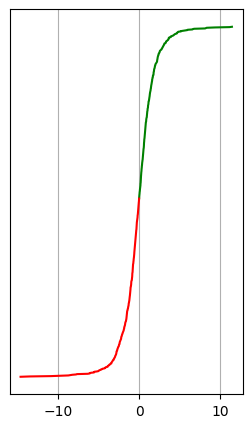

In [172]:
plt.figure(figsize=(3, 5))
errors = pred_obesity_gdf['signed_error'].sort_values().reset_index()
errors['index'] = np.arange(len(errors))
errors_pos = errors[errors['signed_error'] >= 0]
errors_neg = errors[errors['signed_error'] < 0]
plt.plot(errors_pos['signed_error'], errors_pos['index'], color='green')
plt.plot(errors_neg['signed_error'], errors_neg['index'], color='red')
plt.yticks([])
plt.grid(True)
# plt.plot(np.zeros(len(errors)), np.arange(len(errors)), c='k', alpha=0.3)

In [162]:
errors_neg

index  signed_error
0       NaN    -14.672251
1       NaN    -13.534835
2       NaN    -10.924330
3       NaN     -9.638313
4       NaN     -8.758682
...     ...           ...
1047    NaN           NaN
1048    NaN           NaN
1049    NaN           NaN
1050    NaN           NaN
1051    NaN           NaN

[1052 rows x 2 columns]

Text(0, 0.5, 'Census Tract [Ranked by Error]')

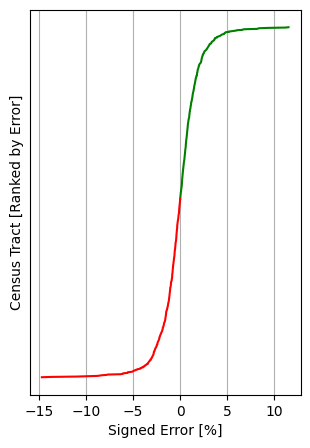

In [187]:
plt.figure(figsize=(3.5, 5))
errors = pred_obesity_gdf['signed_error'].sort_values().reset_index()
errors['index'] = np.arange(len(errors))
errors_pos = errors[errors['signed_error'] >= 0]
errors_neg = errors[errors['signed_error'] < 0]
plt.plot(errors_pos['signed_error'], errors_pos['index'], color='green')
plt.plot(errors_neg['signed_error'], errors_neg['index'], color='red')
plt.yticks([])
plt.grid(True)
plt.xlabel('Signed Error [%]')
plt.ylabel('Census Tract [Ranked by Error]')
# plt.plot(np.zeros(len(errors)), np.arange(len(errors)), c='k', alpha=0.3)

In [176]:
errors

index  signed_error
0         0    -14.672251
1         1    -13.534835
2         2    -10.924330
3         3     -9.638313
4         4     -8.758682
...     ...           ...
1047   1047      8.269124
1048   1048      8.367796
1049   1049      9.378192
1050   1050     11.194508
1051   1051     11.487235

[1052 rows x 2 columns]